In [3]:
import os
import sys
from utils.data import create_dataloader, merge_dataloaders
from tree.tree import Node, grow_tree_from_root
import torch

class Args():
    def __init__(self):
        self = self
args = Args()


#main config
args.dataset_path = 'data' #Path for folder containing the dataset root folder
args.logs_path = 'experiment_logs_cifar10_notebook' #Folder for saving all logs (replaces previous logs in the folder if any)
args.root_node_name = 'Z' #Name for the root node of the tree
args.device=0 #change to select another device
args.amp_enable = False #enables automatic mixed precision if available (executes a lot faster)


#architecture/model parameters
args.nf_g = 128 #Number of feature maps for generator
args.nf_d = 128 #Number of feature maps for discriminator/classifier
args.kernel_size_g = 4 #Size of kernel for generators
args.kernel_size_d = 5 #Size of kernel for discriminator/classifier
args.normalization_d = 'layer_norm' #Type of normalization layer used for discriminator/classifier
args.normalization_g = 'no_norm' #Type of normalization layer used for generator
args.architecture_d = 'cnn' #Specific architecture choice for for discriminator/classifier
args.architecture_g = 'cnn' #Specific architecture choice for for generator
args.img_channels = 1 #Number of channels used for intended types of images
args.latent_dim = 100 #Dimension of generator's latent space
args.batch_size_real = 1000 #Minibatch size for real images
args.batch_size_gen = 100 #Minibatch size for generated images 
args.img_dim = 32 #Image dimensions
args.shared_features_across_ref = True #Shares encoder features among parallel refinement groups

#training parameters
args.lr_d = 0.0001 #Learning rate for discriminator
args.lr_c = 0.00002 #Learning rate for classifier
args.lr_g = 0.0002 #Learning rate for generator
args.b1 = 0.5 # Learning rate for generator
args.b2 = 0.999 #Adam optimizer beta 2 parameter
args.noise_start = 1.5 #Start image noise intensity linearly decaying throughout each GAN/MGAN training
args.epochs_raw_split = 100 #Number of epochs for raw split training
args.epochs_refinement = 100 #Number of epochs for refinement training
args.diversity_parameter_g = 1.0 #Hyperparameter for weighting generators' classification loss component
args.no_refinements = 4 #Number of refinements in each split
args.no_splits = 9 #Number of splits during tree growth
args.collapse_check_epoch = 10 #Epoch after which to check for generation collapse
args.sample_interval = 1 #No. of epochs between printring/saving training logs
args.min_prob_mass_variation = 150 #If the total prob mass variation between two consecutive refinements is less than this number, to save up time, the next refinements are skipped for that node


torch.cuda.set_device(args.device)
                             
dataloader_train = create_dataloader(dataset='cifar10', test=False, batch_size=args.batch_size_real,  path=args.dataset_path)




-----------------------------------
#
#
# SEARCHING NEXT LEAF NODE TO SPLIT
#
#
-----------------------------------
Currently 1 leaf nodes obtained: 
[('Z', '60000.0 prob. mass')]
Selecting for split leaf node Z (prob. mass 60000.0) following the greatest prob. mass criteria.



----------------------------------
#
#
# RAW SPLIT OF NODE Z (ATTEMPT 1) 
#
#
----------------------------------
---------------------
# TRAINING PARAMETERS
---------------------
Training Arguments: 
{'dataset_path': 'data', 'logs_path': 'experiment_logs_cifar10_notebook', 'root_node_name': 'Z', 'device': 0, 'amp_enable': False, 'nf_g': 128, 'nf_d': 128, 'kernel_size_g': 4, 'kernel_size_d': 5, 'normalization_d': 'layer_norm', 'normalization_g': 'no_norm', 'architecture_d': 'cnn', 'architecture_g': 'cnn', 'img_channels': 1, 'latent_dim': 100, 'batch_size_real': 1000, 'batch_size_gen': 100, 'img_dim': 32, 'shared_features_across_ref': True, 'lr_d': 0.0001, 'lr_c': 2e-05, 'lr_g': 0.0002, 'b1': 0.5, 'b2': 0.999,

  0%|          | 0/100 [00:00<?, ?it/s]



--------------------------------------------------------------------------------
# [RAW SPLIT NODE Z] [EPOCH 1/100] [EPOCH TIME INTERVAL: 83.35 sec.] [ATTEMPT 1]
--------------------------------------------------------------------------------
Mean epoch losses/acc for each component in the MGAN: 
{'loss_disc_real': 0.33877, 'acc_disc_real': 0.85783, 'loss_disc_fake': 0.29106, 'acc_disc_fake': 0.87392, 'loss_gen_disc': 3.73689, 'loss_gen_clasf': 0.21376, 'loss_clasf': 0.22663, 'acc_clasf': 0.96208}


Sample of generated images from raw split MGAN for node Z (each row for each generator' output):
(This sample is saved at experiment_logs_cifar10_notebook/Z/raw_split/attempt_1_ep_1.jpg)


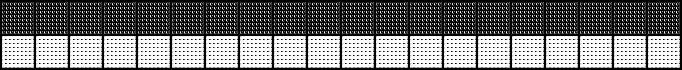

  1%|          | 1/100 [01:23<2:17:33, 83.37s/it]


Generator collapse will be checked after epoch 10


--------------------------------------------------------------------------------
# [RAW SPLIT NODE Z] [EPOCH 2/100] [EPOCH TIME INTERVAL: 81.27 sec.] [ATTEMPT 1]
--------------------------------------------------------------------------------
Mean epoch losses/acc for each component in the MGAN: 
{'loss_disc_real': 0.11974, 'acc_disc_real': 0.96355, 'loss_disc_fake': 0.05723, 'acc_disc_fake': 0.98783, 'loss_gen_disc': 4.7304, 'loss_gen_clasf': 0.02232, 'loss_clasf': 0.02292, 'acc_clasf': 1.0}


Sample of generated images from raw split MGAN for node Z (each row for each generator' output):
(This sample is saved at experiment_logs_cifar10_notebook/Z/raw_split/attempt_1_ep_2.jpg)


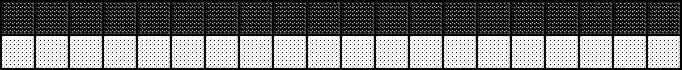

  2%|▏         | 2/100 [02:44<2:14:10, 82.15s/it]


Generator collapse will be checked after epoch 10


--------------------------------------------------------------------------------
# [RAW SPLIT NODE Z] [EPOCH 3/100] [EPOCH TIME INTERVAL: 80.33 sec.] [ATTEMPT 1]
--------------------------------------------------------------------------------
Mean epoch losses/acc for each component in the MGAN: 
{'loss_disc_real': 0.13781, 'acc_disc_real': 0.94637, 'loss_disc_fake': 0.15552, 'acc_disc_fake': 0.97792, 'loss_gen_disc': 4.18261, 'loss_gen_clasf': 0.01894, 'loss_clasf': 0.02178, 'acc_clasf': 0.99292}


Sample of generated images from raw split MGAN for node Z (each row for each generator' output):
(This sample is saved at experiment_logs_cifar10_notebook/Z/raw_split/attempt_1_ep_3.jpg)


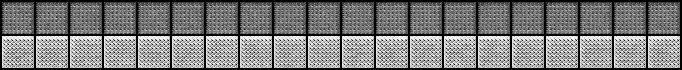

  3%|▎         | 3/100 [04:04<2:11:28, 81.32s/it]


Generator collapse will be checked after epoch 10


--------------------------------------------------------------------------------
# [RAW SPLIT NODE Z] [EPOCH 4/100] [EPOCH TIME INTERVAL: 80.07 sec.] [ATTEMPT 1]
--------------------------------------------------------------------------------
Mean epoch losses/acc for each component in the MGAN: 
{'loss_disc_real': 0.35036, 'acc_disc_real': 0.84425, 'loss_disc_fake': 0.25749, 'acc_disc_fake': 0.9365, 'loss_gen_disc': 2.82815, 'loss_gen_clasf': 0.04226, 'loss_clasf': 0.04987, 'acc_clasf': 0.99883}


Sample of generated images from raw split MGAN for node Z (each row for each generator' output):
(This sample is saved at experiment_logs_cifar10_notebook/Z/raw_split/attempt_1_ep_4.jpg)


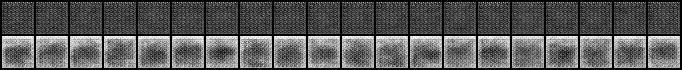

  4%|▍         | 4/100 [05:25<2:09:19, 80.83s/it]


Generator collapse will be checked after epoch 10


--------------------------------------------------------------------------------
# [RAW SPLIT NODE Z] [EPOCH 5/100] [EPOCH TIME INTERVAL: 80.10 sec.] [ATTEMPT 1]
--------------------------------------------------------------------------------
Mean epoch losses/acc for each component in the MGAN: 
{'loss_disc_real': 0.57535, 'acc_disc_real': 0.70817, 'loss_disc_fake': 0.51086, 'acc_disc_fake': 0.77725, 'loss_gen_disc': 1.88754, 'loss_gen_clasf': 0.08952, 'loss_clasf': 0.10868, 'acc_clasf': 0.97142}


Sample of generated images from raw split MGAN for node Z (each row for each generator' output):
(This sample is saved at experiment_logs_cifar10_notebook/Z/raw_split/attempt_1_ep_5.jpg)


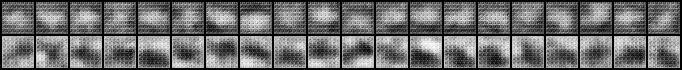

  5%|▌         | 5/100 [06:45<2:07:34, 80.57s/it]


Generator collapse will be checked after epoch 10


--------------------------------------------------------------------------------
# [RAW SPLIT NODE Z] [EPOCH 6/100] [EPOCH TIME INTERVAL: 80.18 sec.] [ATTEMPT 1]
--------------------------------------------------------------------------------
Mean epoch losses/acc for each component in the MGAN: 
{'loss_disc_real': 0.58099, 'acc_disc_real': 0.68938, 'loss_disc_fake': 0.56707, 'acc_disc_fake': 0.72217, 'loss_gen_disc': 1.21171, 'loss_gen_clasf': 0.07136, 'loss_clasf': 0.07384, 'acc_clasf': 0.99942}


Sample of generated images from raw split MGAN for node Z (each row for each generator' output):
(This sample is saved at experiment_logs_cifar10_notebook/Z/raw_split/attempt_1_ep_6.jpg)


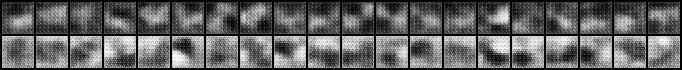

  6%|▌         | 6/100 [08:05<2:06:01, 80.44s/it]


Generator collapse will be checked after epoch 10


--------------------------------------------------------------------------------
# [RAW SPLIT NODE Z] [EPOCH 7/100] [EPOCH TIME INTERVAL: 79.85 sec.] [ATTEMPT 1]
--------------------------------------------------------------------------------
Mean epoch losses/acc for each component in the MGAN: 
{'loss_disc_real': 0.53117, 'acc_disc_real': 0.71715, 'loss_disc_fake': 0.49507, 'acc_disc_fake': 0.78625, 'loss_gen_disc': 1.43098, 'loss_gen_clasf': 0.07311, 'loss_clasf': 0.07592, 'acc_clasf': 0.99808}


Sample of generated images from raw split MGAN for node Z (each row for each generator' output):
(This sample is saved at experiment_logs_cifar10_notebook/Z/raw_split/attempt_1_ep_7.jpg)


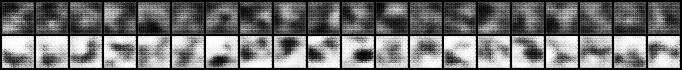

  7%|▋         | 7/100 [09:25<2:04:23, 80.25s/it]


Generator collapse will be checked after epoch 10


--------------------------------------------------------------------------------
# [RAW SPLIT NODE Z] [EPOCH 8/100] [EPOCH TIME INTERVAL: 79.48 sec.] [ATTEMPT 1]
--------------------------------------------------------------------------------
Mean epoch losses/acc for each component in the MGAN: 
{'loss_disc_real': 0.47425, 'acc_disc_real': 0.7596, 'loss_disc_fake': 0.45228, 'acc_disc_fake': 0.81292, 'loss_gen_disc': 1.47767, 'loss_gen_clasf': 0.06029, 'loss_clasf': 0.06175, 'acc_clasf': 0.99717}


Sample of generated images from raw split MGAN for node Z (each row for each generator' output):
(This sample is saved at experiment_logs_cifar10_notebook/Z/raw_split/attempt_1_ep_8.jpg)


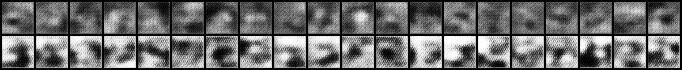

  8%|▊         | 8/100 [10:44<2:02:40, 80.01s/it]


Generator collapse will be checked after epoch 10


--------------------------------------------------------------------------------
# [RAW SPLIT NODE Z] [EPOCH 9/100] [EPOCH TIME INTERVAL: 79.44 sec.] [ATTEMPT 1]
--------------------------------------------------------------------------------
Mean epoch losses/acc for each component in the MGAN: 
{'loss_disc_real': 0.56617, 'acc_disc_real': 0.68847, 'loss_disc_fake': 0.53068, 'acc_disc_fake': 0.74967, 'loss_gen_disc': 1.35324, 'loss_gen_clasf': 0.06077, 'loss_clasf': 0.06448, 'acc_clasf': 0.99583}


Sample of generated images from raw split MGAN for node Z (each row for each generator' output):
(This sample is saved at experiment_logs_cifar10_notebook/Z/raw_split/attempt_1_ep_9.jpg)


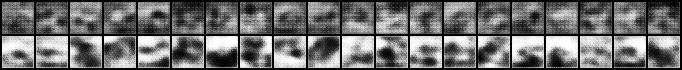

  9%|▉         | 9/100 [12:04<2:01:04, 79.83s/it]


Generator collapse will be checked after epoch 10


---------------------------------------------------------------------------------
# [RAW SPLIT NODE Z] [EPOCH 10/100] [EPOCH TIME INTERVAL: 79.29 sec.] [ATTEMPT 1]
---------------------------------------------------------------------------------
Mean epoch losses/acc for each component in the MGAN: 
{'loss_disc_real': 0.57274, 'acc_disc_real': 0.67815, 'loss_disc_fake': 0.55767, 'acc_disc_fake': 0.7295, 'loss_gen_disc': 1.2589, 'loss_gen_clasf': 0.0382, 'loss_clasf': 0.03869, 'acc_clasf': 0.99725}


Sample of generated images from raw split MGAN for node Z (each row for each generator' output):
(This sample is saved at experiment_logs_cifar10_notebook/Z/raw_split/attempt_1_ep_10.jpg)


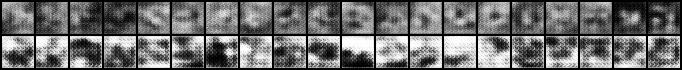

 10%|█         | 10/100 [13:23<1:59:31, 79.68s/it]


Generator collapse check: no collapse detected, training shall continue.


---------------------------------------------------------------------------------
# [RAW SPLIT NODE Z] [EPOCH 11/100] [EPOCH TIME INTERVAL: 79.22 sec.] [ATTEMPT 1]
---------------------------------------------------------------------------------
Mean epoch losses/acc for each component in the MGAN: 
{'loss_disc_real': 0.59117, 'acc_disc_real': 0.66053, 'loss_disc_fake': 0.56809, 'acc_disc_fake': 0.7185, 'loss_gen_disc': 1.20196, 'loss_gen_clasf': 0.02861, 'loss_clasf': 0.02904, 'acc_clasf': 0.99625}


Sample of generated images from raw split MGAN for node Z (each row for each generator' output):
(This sample is saved at experiment_logs_cifar10_notebook/Z/raw_split/attempt_1_ep_11.jpg)


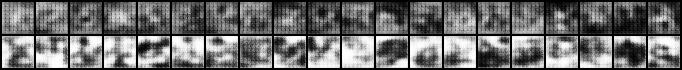

 11%|█         | 11/100 [14:42<1:58:00, 79.55s/it]


Generator collapse check: no collapse detected, training shall continue.


---------------------------------------------------------------------------------
# [RAW SPLIT NODE Z] [EPOCH 12/100] [EPOCH TIME INTERVAL: 79.38 sec.] [ATTEMPT 1]
---------------------------------------------------------------------------------
Mean epoch losses/acc for each component in the MGAN: 
{'loss_disc_real': 0.57115, 'acc_disc_real': 0.68015, 'loss_disc_fake': 0.55661, 'acc_disc_fake': 0.73717, 'loss_gen_disc': 1.15223, 'loss_gen_clasf': 0.02382, 'loss_clasf': 0.02411, 'acc_clasf': 0.99633}


Sample of generated images from raw split MGAN for node Z (each row for each generator' output):
(This sample is saved at experiment_logs_cifar10_notebook/Z/raw_split/attempt_1_ep_12.jpg)


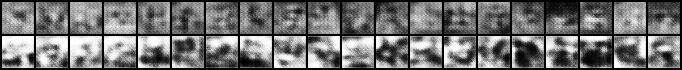

 12%|█▏        | 12/100 [16:02<1:56:36, 79.51s/it]


Generator collapse check: no collapse detected, training shall continue.


---------------------------------------------------------------------------------
# [RAW SPLIT NODE Z] [EPOCH 13/100] [EPOCH TIME INTERVAL: 79.35 sec.] [ATTEMPT 1]
---------------------------------------------------------------------------------
Mean epoch losses/acc for each component in the MGAN: 
{'loss_disc_real': 0.56669, 'acc_disc_real': 0.68827, 'loss_disc_fake': 0.55476, 'acc_disc_fake': 0.73508, 'loss_gen_disc': 1.20275, 'loss_gen_clasf': 0.02562, 'loss_clasf': 0.02605, 'acc_clasf': 0.9935}


Sample of generated images from raw split MGAN for node Z (each row for each generator' output):
(This sample is saved at experiment_logs_cifar10_notebook/Z/raw_split/attempt_1_ep_13.jpg)


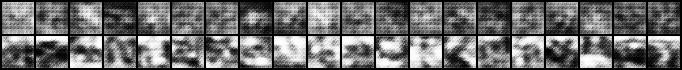

 13%|█▎        | 13/100 [17:21<1:55:14, 79.48s/it]


Generator collapse check: no collapse detected, training shall continue.


---------------------------------------------------------------------------------
# [RAW SPLIT NODE Z] [EPOCH 14/100] [EPOCH TIME INTERVAL: 79.34 sec.] [ATTEMPT 1]
---------------------------------------------------------------------------------
Mean epoch losses/acc for each component in the MGAN: 
{'loss_disc_real': 0.57825, 'acc_disc_real': 0.68408, 'loss_disc_fake': 0.56695, 'acc_disc_fake': 0.72358, 'loss_gen_disc': 1.17882, 'loss_gen_clasf': 0.03387, 'loss_clasf': 0.03453, 'acc_clasf': 0.99008}


Sample of generated images from raw split MGAN for node Z (each row for each generator' output):
(This sample is saved at experiment_logs_cifar10_notebook/Z/raw_split/attempt_1_ep_14.jpg)


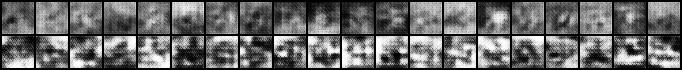

 14%|█▍        | 14/100 [18:40<1:53:52, 79.45s/it]


Generator collapse check: no collapse detected, training shall continue.


---------------------------------------------------------------------------------
# [RAW SPLIT NODE Z] [EPOCH 15/100] [EPOCH TIME INTERVAL: 79.17 sec.] [ATTEMPT 1]
---------------------------------------------------------------------------------
Mean epoch losses/acc for each component in the MGAN: 
{'loss_disc_real': 0.5834, 'acc_disc_real': 0.6825, 'loss_disc_fake': 0.5648, 'acc_disc_fake': 0.726, 'loss_gen_disc': 1.17944, 'loss_gen_clasf': 0.03709, 'loss_clasf': 0.0376, 'acc_clasf': 0.989}


Sample of generated images from raw split MGAN for node Z (each row for each generator' output):
(This sample is saved at experiment_logs_cifar10_notebook/Z/raw_split/attempt_1_ep_15.jpg)


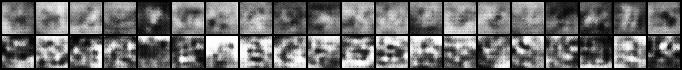

 15%|█▌        | 15/100 [20:00<1:52:26, 79.38s/it]


Generator collapse check: no collapse detected, training shall continue.


---------------------------------------------------------------------------------
# [RAW SPLIT NODE Z] [EPOCH 16/100] [EPOCH TIME INTERVAL: 79.59 sec.] [ATTEMPT 1]
---------------------------------------------------------------------------------
Mean epoch losses/acc for each component in the MGAN: 
{'loss_disc_real': 0.57126, 'acc_disc_real': 0.6934, 'loss_disc_fake': 0.55148, 'acc_disc_fake': 0.73558, 'loss_gen_disc': 1.21561, 'loss_gen_clasf': 0.04243, 'loss_clasf': 0.04333, 'acc_clasf': 0.98542}


Sample of generated images from raw split MGAN for node Z (each row for each generator' output):
(This sample is saved at experiment_logs_cifar10_notebook/Z/raw_split/attempt_1_ep_16.jpg)


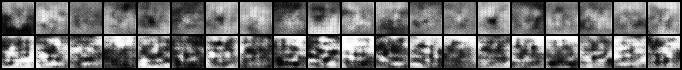

 16%|█▌        | 16/100 [21:19<1:51:14, 79.45s/it]


Generator collapse check: no collapse detected, training shall continue.


---------------------------------------------------------------------------------
# [RAW SPLIT NODE Z] [EPOCH 17/100] [EPOCH TIME INTERVAL: 79.61 sec.] [ATTEMPT 1]
---------------------------------------------------------------------------------
Mean epoch losses/acc for each component in the MGAN: 
{'loss_disc_real': 0.56254, 'acc_disc_real': 0.6995, 'loss_disc_fake': 0.53222, 'acc_disc_fake': 0.758, 'loss_gen_disc': 1.2352, 'loss_gen_clasf': 0.03731, 'loss_clasf': 0.03783, 'acc_clasf': 0.98783}


Sample of generated images from raw split MGAN for node Z (each row for each generator' output):
(This sample is saved at experiment_logs_cifar10_notebook/Z/raw_split/attempt_1_ep_17.jpg)


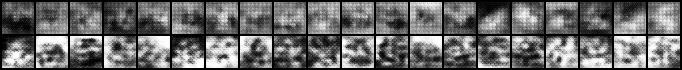

 17%|█▋        | 17/100 [22:39<1:49:59, 79.51s/it]


Generator collapse check: no collapse detected, training shall continue.


---------------------------------------------------------------------------------
# [RAW SPLIT NODE Z] [EPOCH 18/100] [EPOCH TIME INTERVAL: 79.20 sec.] [ATTEMPT 1]
---------------------------------------------------------------------------------
Mean epoch losses/acc for each component in the MGAN: 
{'loss_disc_real': 0.55081, 'acc_disc_real': 0.7087, 'loss_disc_fake': 0.52423, 'acc_disc_fake': 0.76317, 'loss_gen_disc': 1.27131, 'loss_gen_clasf': 0.04021, 'loss_clasf': 0.04104, 'acc_clasf': 0.98433}


Sample of generated images from raw split MGAN for node Z (each row for each generator' output):
(This sample is saved at experiment_logs_cifar10_notebook/Z/raw_split/attempt_1_ep_18.jpg)


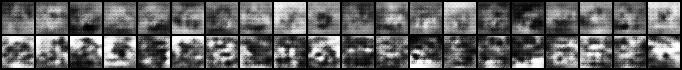

 18%|█▊        | 18/100 [23:58<1:48:33, 79.43s/it]


Generator collapse check: no collapse detected, training shall continue.


---------------------------------------------------------------------------------
# [RAW SPLIT NODE Z] [EPOCH 19/100] [EPOCH TIME INTERVAL: 79.45 sec.] [ATTEMPT 1]
---------------------------------------------------------------------------------
Mean epoch losses/acc for each component in the MGAN: 
{'loss_disc_real': 0.5307, 'acc_disc_real': 0.72125, 'loss_disc_fake': 0.50405, 'acc_disc_fake': 0.78008, 'loss_gen_disc': 1.30386, 'loss_gen_clasf': 0.04276, 'loss_clasf': 0.04427, 'acc_clasf': 0.98317}


Sample of generated images from raw split MGAN for node Z (each row for each generator' output):
(This sample is saved at experiment_logs_cifar10_notebook/Z/raw_split/attempt_1_ep_19.jpg)


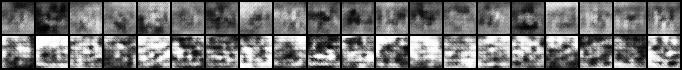

 19%|█▉        | 19/100 [25:18<1:47:15, 79.45s/it]


Generator collapse check: no collapse detected, training shall continue.


---------------------------------------------------------------------------------
# [RAW SPLIT NODE Z] [EPOCH 20/100] [EPOCH TIME INTERVAL: 79.29 sec.] [ATTEMPT 1]
---------------------------------------------------------------------------------
Mean epoch losses/acc for each component in the MGAN: 
{'loss_disc_real': 0.52075, 'acc_disc_real': 0.72587, 'loss_disc_fake': 0.48687, 'acc_disc_fake': 0.80025, 'loss_gen_disc': 1.29359, 'loss_gen_clasf': 0.03749, 'loss_clasf': 0.03834, 'acc_clasf': 0.986}


Sample of generated images from raw split MGAN for node Z (each row for each generator' output):
(This sample is saved at experiment_logs_cifar10_notebook/Z/raw_split/attempt_1_ep_20.jpg)


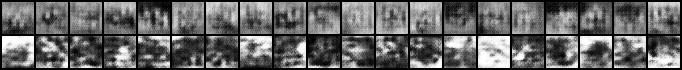

 20%|██        | 20/100 [26:37<1:45:53, 79.42s/it]


Generator collapse check: no collapse detected, training shall continue.


---------------------------------------------------------------------------------
# [RAW SPLIT NODE Z] [EPOCH 21/100] [EPOCH TIME INTERVAL: 79.22 sec.] [ATTEMPT 1]
---------------------------------------------------------------------------------
Mean epoch losses/acc for each component in the MGAN: 
{'loss_disc_real': 0.51935, 'acc_disc_real': 0.72952, 'loss_disc_fake': 0.50389, 'acc_disc_fake': 0.77375, 'loss_gen_disc': 1.3507, 'loss_gen_clasf': 0.04939, 'loss_clasf': 0.05136, 'acc_clasf': 0.9815}


Sample of generated images from raw split MGAN for node Z (each row for each generator' output):
(This sample is saved at experiment_logs_cifar10_notebook/Z/raw_split/attempt_1_ep_21.jpg)


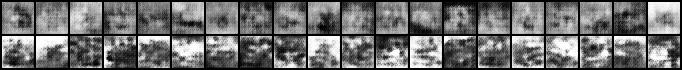

 21%|██        | 21/100 [27:56<1:44:30, 79.37s/it]


Generator collapse check: no collapse detected, training shall continue.


---------------------------------------------------------------------------------
# [RAW SPLIT NODE Z] [EPOCH 22/100] [EPOCH TIME INTERVAL: 79.19 sec.] [ATTEMPT 1]
---------------------------------------------------------------------------------
Mean epoch losses/acc for each component in the MGAN: 
{'loss_disc_real': 0.52624, 'acc_disc_real': 0.72523, 'loss_disc_fake': 0.49422, 'acc_disc_fake': 0.78642, 'loss_gen_disc': 1.34484, 'loss_gen_clasf': 0.04541, 'loss_clasf': 0.04631, 'acc_clasf': 0.9835}


Sample of generated images from raw split MGAN for node Z (each row for each generator' output):
(This sample is saved at experiment_logs_cifar10_notebook/Z/raw_split/attempt_1_ep_22.jpg)


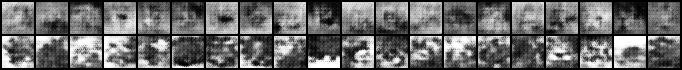

 22%|██▏       | 22/100 [29:16<1:43:07, 79.33s/it]


Generator collapse check: no collapse detected, training shall continue.


---------------------------------------------------------------------------------
# [RAW SPLIT NODE Z] [EPOCH 23/100] [EPOCH TIME INTERVAL: 79.17 sec.] [ATTEMPT 1]
---------------------------------------------------------------------------------
Mean epoch losses/acc for each component in the MGAN: 
{'loss_disc_real': 0.53527, 'acc_disc_real': 0.7178, 'loss_disc_fake': 0.52293, 'acc_disc_fake': 0.75942, 'loss_gen_disc': 1.30451, 'loss_gen_clasf': 0.05491, 'loss_clasf': 0.05716, 'acc_clasf': 0.97808}


Sample of generated images from raw split MGAN for node Z (each row for each generator' output):
(This sample is saved at experiment_logs_cifar10_notebook/Z/raw_split/attempt_1_ep_23.jpg)


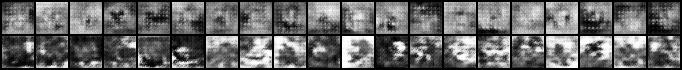

 23%|██▎       | 23/100 [30:35<1:41:45, 79.29s/it]


Generator collapse check: no collapse detected, training shall continue.


---------------------------------------------------------------------------------
# [RAW SPLIT NODE Z] [EPOCH 24/100] [EPOCH TIME INTERVAL: 79.18 sec.] [ATTEMPT 1]
---------------------------------------------------------------------------------
Mean epoch losses/acc for each component in the MGAN: 
{'loss_disc_real': 0.55051, 'acc_disc_real': 0.70583, 'loss_disc_fake': 0.53235, 'acc_disc_fake': 0.75425, 'loss_gen_disc': 1.28691, 'loss_gen_clasf': 0.05371, 'loss_clasf': 0.05541, 'acc_clasf': 0.9815}


Sample of generated images from raw split MGAN for node Z (each row for each generator' output):
(This sample is saved at experiment_logs_cifar10_notebook/Z/raw_split/attempt_1_ep_24.jpg)


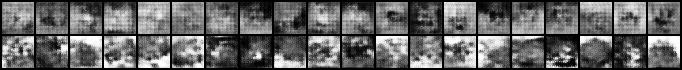

 24%|██▍       | 24/100 [31:54<1:40:24, 79.27s/it]


Generator collapse check: no collapse detected, training shall continue.


---------------------------------------------------------------------------------
# [RAW SPLIT NODE Z] [EPOCH 25/100] [EPOCH TIME INTERVAL: 79.14 sec.] [ATTEMPT 1]
---------------------------------------------------------------------------------
Mean epoch losses/acc for each component in the MGAN: 
{'loss_disc_real': 0.56292, 'acc_disc_real': 0.6959, 'loss_disc_fake': 0.55402, 'acc_disc_fake': 0.72825, 'loss_gen_disc': 1.20185, 'loss_gen_clasf': 0.04815, 'loss_clasf': 0.04909, 'acc_clasf': 0.98433}


Sample of generated images from raw split MGAN for node Z (each row for each generator' output):
(This sample is saved at experiment_logs_cifar10_notebook/Z/raw_split/attempt_1_ep_25.jpg)


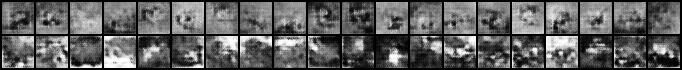

 25%|██▌       | 25/100 [33:13<1:39:03, 79.25s/it]


Generator collapse check: no collapse detected, training shall continue.


---------------------------------------------------------------------------------
# [RAW SPLIT NODE Z] [EPOCH 26/100] [EPOCH TIME INTERVAL: 79.30 sec.] [ATTEMPT 1]
---------------------------------------------------------------------------------
Mean epoch losses/acc for each component in the MGAN: 
{'loss_disc_real': 0.57558, 'acc_disc_real': 0.6887, 'loss_disc_fake': 0.56208, 'acc_disc_fake': 0.72083, 'loss_gen_disc': 1.15869, 'loss_gen_clasf': 0.04095, 'loss_clasf': 0.04171, 'acc_clasf': 0.98892}


Sample of generated images from raw split MGAN for node Z (each row for each generator' output):
(This sample is saved at experiment_logs_cifar10_notebook/Z/raw_split/attempt_1_ep_26.jpg)


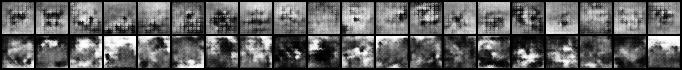

 26%|██▌       | 26/100 [34:32<1:37:46, 79.28s/it]


Generator collapse check: no collapse detected, training shall continue.


---------------------------------------------------------------------------------
# [RAW SPLIT NODE Z] [EPOCH 27/100] [EPOCH TIME INTERVAL: 79.83 sec.] [ATTEMPT 1]
---------------------------------------------------------------------------------
Mean epoch losses/acc for each component in the MGAN: 
{'loss_disc_real': 0.57913, 'acc_disc_real': 0.68898, 'loss_disc_fake': 0.56987, 'acc_disc_fake': 0.71708, 'loss_gen_disc': 1.15617, 'loss_gen_clasf': 0.03825, 'loss_clasf': 0.03947, 'acc_clasf': 0.98817}


Sample of generated images from raw split MGAN for node Z (each row for each generator' output):
(This sample is saved at experiment_logs_cifar10_notebook/Z/raw_split/attempt_1_ep_27.jpg)


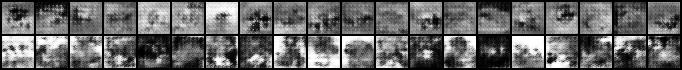

 27%|██▋       | 27/100 [35:52<1:36:40, 79.45s/it]


Generator collapse check: no collapse detected, training shall continue.


---------------------------------------------------------------------------------
# [RAW SPLIT NODE Z] [EPOCH 28/100] [EPOCH TIME INTERVAL: 79.91 sec.] [ATTEMPT 1]
---------------------------------------------------------------------------------
Mean epoch losses/acc for each component in the MGAN: 
{'loss_disc_real': 0.60188, 'acc_disc_real': 0.66995, 'loss_disc_fake': 0.5847, 'acc_disc_fake': 0.70475, 'loss_gen_disc': 1.1093, 'loss_gen_clasf': 0.04138, 'loss_clasf': 0.04226, 'acc_clasf': 0.98708}


Sample of generated images from raw split MGAN for node Z (each row for each generator' output):
(This sample is saved at experiment_logs_cifar10_notebook/Z/raw_split/attempt_1_ep_28.jpg)


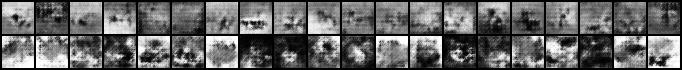

 28%|██▊       | 28/100 [37:12<1:35:31, 79.60s/it]


Generator collapse check: no collapse detected, training shall continue.


---------------------------------------------------------------------------------
# [RAW SPLIT NODE Z] [EPOCH 29/100] [EPOCH TIME INTERVAL: 79.27 sec.] [ATTEMPT 1]
---------------------------------------------------------------------------------
Mean epoch losses/acc for each component in the MGAN: 
{'loss_disc_real': 0.59007, 'acc_disc_real': 0.67558, 'loss_disc_fake': 0.58021, 'acc_disc_fake': 0.70808, 'loss_gen_disc': 1.12188, 'loss_gen_clasf': 0.03217, 'loss_clasf': 0.03261, 'acc_clasf': 0.99092}


Sample of generated images from raw split MGAN for node Z (each row for each generator' output):
(This sample is saved at experiment_logs_cifar10_notebook/Z/raw_split/attempt_1_ep_29.jpg)


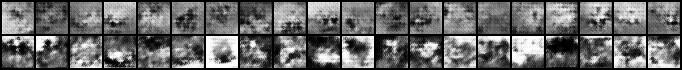

 29%|██▉       | 29/100 [38:32<1:34:05, 79.51s/it]


Generator collapse check: no collapse detected, training shall continue.


---------------------------------------------------------------------------------
# [RAW SPLIT NODE Z] [EPOCH 30/100] [EPOCH TIME INTERVAL: 79.08 sec.] [ATTEMPT 1]
---------------------------------------------------------------------------------
Mean epoch losses/acc for each component in the MGAN: 
{'loss_disc_real': 0.58784, 'acc_disc_real': 0.67637, 'loss_disc_fake': 0.57238, 'acc_disc_fake': 0.7145, 'loss_gen_disc': 1.10886, 'loss_gen_clasf': 0.03122, 'loss_clasf': 0.03162, 'acc_clasf': 0.99108}


Sample of generated images from raw split MGAN for node Z (each row for each generator' output):
(This sample is saved at experiment_logs_cifar10_notebook/Z/raw_split/attempt_1_ep_30.jpg)


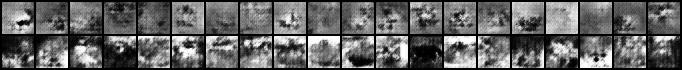

 30%|███       | 30/100 [39:51<1:32:37, 79.40s/it]


Generator collapse check: no collapse detected, training shall continue.


---------------------------------------------------------------------------------
# [RAW SPLIT NODE Z] [EPOCH 31/100] [EPOCH TIME INTERVAL: 79.23 sec.] [ATTEMPT 1]
---------------------------------------------------------------------------------
Mean epoch losses/acc for each component in the MGAN: 
{'loss_disc_real': 0.59186, 'acc_disc_real': 0.67202, 'loss_disc_fake': 0.56954, 'acc_disc_fake': 0.71417, 'loss_gen_disc': 1.13974, 'loss_gen_clasf': 0.02789, 'loss_clasf': 0.0283, 'acc_clasf': 0.99242}


Sample of generated images from raw split MGAN for node Z (each row for each generator' output):
(This sample is saved at experiment_logs_cifar10_notebook/Z/raw_split/attempt_1_ep_31.jpg)


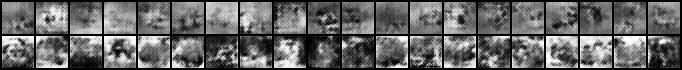

 31%|███       | 31/100 [41:10<1:31:15, 79.36s/it]


Generator collapse check: no collapse detected, training shall continue.


---------------------------------------------------------------------------------
# [RAW SPLIT NODE Z] [EPOCH 32/100] [EPOCH TIME INTERVAL: 79.20 sec.] [ATTEMPT 1]
---------------------------------------------------------------------------------
Mean epoch losses/acc for each component in the MGAN: 
{'loss_disc_real': 0.58568, 'acc_disc_real': 0.67777, 'loss_disc_fake': 0.56909, 'acc_disc_fake': 0.72083, 'loss_gen_disc': 1.13731, 'loss_gen_clasf': 0.02818, 'loss_clasf': 0.02848, 'acc_clasf': 0.9925}


Sample of generated images from raw split MGAN for node Z (each row for each generator' output):
(This sample is saved at experiment_logs_cifar10_notebook/Z/raw_split/attempt_1_ep_32.jpg)


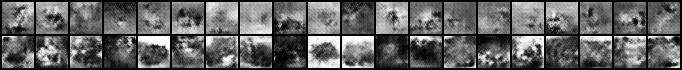

 32%|███▏      | 32/100 [42:29<1:29:54, 79.32s/it]


Generator collapse check: no collapse detected, training shall continue.


---------------------------------------------------------------------------------
# [RAW SPLIT NODE Z] [EPOCH 33/100] [EPOCH TIME INTERVAL: 79.26 sec.] [ATTEMPT 1]
---------------------------------------------------------------------------------
Mean epoch losses/acc for each component in the MGAN: 
{'loss_disc_real': 0.60246, 'acc_disc_real': 0.66825, 'loss_disc_fake': 0.58828, 'acc_disc_fake': 0.70642, 'loss_gen_disc': 1.17069, 'loss_gen_clasf': 0.02953, 'loss_clasf': 0.03015, 'acc_clasf': 0.99117}


Sample of generated images from raw split MGAN for node Z (each row for each generator' output):
(This sample is saved at experiment_logs_cifar10_notebook/Z/raw_split/attempt_1_ep_33.jpg)


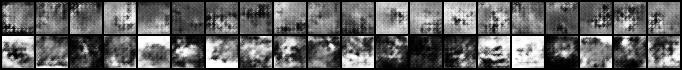

 33%|███▎      | 33/100 [43:49<1:28:34, 79.32s/it]


Generator collapse check: no collapse detected, training shall continue.


---------------------------------------------------------------------------------
# [RAW SPLIT NODE Z] [EPOCH 34/100] [EPOCH TIME INTERVAL: 79.43 sec.] [ATTEMPT 1]
---------------------------------------------------------------------------------
Mean epoch losses/acc for each component in the MGAN: 
{'loss_disc_real': 0.56351, 'acc_disc_real': 0.69313, 'loss_disc_fake': 0.54773, 'acc_disc_fake': 0.75183, 'loss_gen_disc': 1.12282, 'loss_gen_clasf': 0.02559, 'loss_clasf': 0.02594, 'acc_clasf': 0.99317}


Sample of generated images from raw split MGAN for node Z (each row for each generator' output):
(This sample is saved at experiment_logs_cifar10_notebook/Z/raw_split/attempt_1_ep_34.jpg)


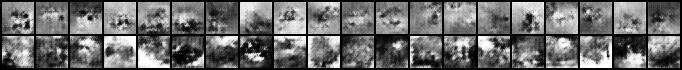

 34%|███▍      | 34/100 [45:08<1:27:18, 79.36s/it]


Generator collapse check: no collapse detected, training shall continue.


---------------------------------------------------------------------------------
# [RAW SPLIT NODE Z] [EPOCH 35/100] [EPOCH TIME INTERVAL: 79.78 sec.] [ATTEMPT 1]
---------------------------------------------------------------------------------
Mean epoch losses/acc for each component in the MGAN: 
{'loss_disc_real': 0.60362, 'acc_disc_real': 0.67985, 'loss_disc_fake': 0.5838, 'acc_disc_fake': 0.71867, 'loss_gen_disc': 1.22088, 'loss_gen_clasf': 0.02448, 'loss_clasf': 0.02496, 'acc_clasf': 0.99267}


Sample of generated images from raw split MGAN for node Z (each row for each generator' output):
(This sample is saved at experiment_logs_cifar10_notebook/Z/raw_split/attempt_1_ep_35.jpg)


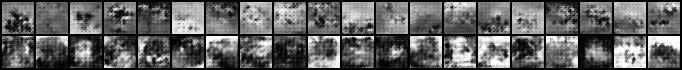

 35%|███▌      | 35/100 [46:28<1:26:07, 79.50s/it]


Generator collapse check: no collapse detected, training shall continue.


---------------------------------------------------------------------------------
# [RAW SPLIT NODE Z] [EPOCH 36/100] [EPOCH TIME INTERVAL: 79.38 sec.] [ATTEMPT 1]
---------------------------------------------------------------------------------
Mean epoch losses/acc for each component in the MGAN: 
{'loss_disc_real': 0.57298, 'acc_disc_real': 0.68363, 'loss_disc_fake': 0.54392, 'acc_disc_fake': 0.7565, 'loss_gen_disc': 1.10193, 'loss_gen_clasf': 0.02592, 'loss_clasf': 0.0263, 'acc_clasf': 0.99258}


Sample of generated images from raw split MGAN for node Z (each row for each generator' output):
(This sample is saved at experiment_logs_cifar10_notebook/Z/raw_split/attempt_1_ep_36.jpg)


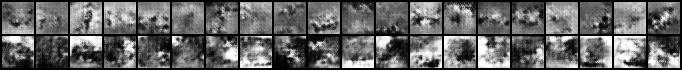

 36%|███▌      | 36/100 [47:47<1:24:46, 79.48s/it]


Generator collapse check: no collapse detected, training shall continue.


---------------------------------------------------------------------------------
# [RAW SPLIT NODE Z] [EPOCH 37/100] [EPOCH TIME INTERVAL: 79.20 sec.] [ATTEMPT 1]
---------------------------------------------------------------------------------
Mean epoch losses/acc for each component in the MGAN: 
{'loss_disc_real': 0.54771, 'acc_disc_real': 0.70077, 'loss_disc_fake': 0.52581, 'acc_disc_fake': 0.76833, 'loss_gen_disc': 1.20235, 'loss_gen_clasf': 0.02492, 'loss_clasf': 0.02528, 'acc_clasf': 0.9925}


Sample of generated images from raw split MGAN for node Z (each row for each generator' output):
(This sample is saved at experiment_logs_cifar10_notebook/Z/raw_split/attempt_1_ep_37.jpg)


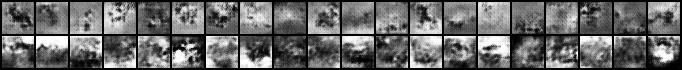

 37%|███▋      | 37/100 [49:07<1:23:22, 79.41s/it]


Generator collapse check: no collapse detected, training shall continue.


---------------------------------------------------------------------------------
# [RAW SPLIT NODE Z] [EPOCH 38/100] [EPOCH TIME INTERVAL: 79.16 sec.] [ATTEMPT 1]
---------------------------------------------------------------------------------
Mean epoch losses/acc for each component in the MGAN: 
{'loss_disc_real': 0.56177, 'acc_disc_real': 0.68713, 'loss_disc_fake': 0.53535, 'acc_disc_fake': 0.74825, 'loss_gen_disc': 1.25412, 'loss_gen_clasf': 0.02712, 'loss_clasf': 0.02766, 'acc_clasf': 0.9925}


Sample of generated images from raw split MGAN for node Z (each row for each generator' output):
(This sample is saved at experiment_logs_cifar10_notebook/Z/raw_split/attempt_1_ep_38.jpg)


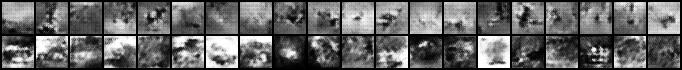

 38%|███▊      | 38/100 [50:26<1:21:59, 79.34s/it]


Generator collapse check: no collapse detected, training shall continue.


---------------------------------------------------------------------------------
# [RAW SPLIT NODE Z] [EPOCH 39/100] [EPOCH TIME INTERVAL: 79.19 sec.] [ATTEMPT 1]
---------------------------------------------------------------------------------
Mean epoch losses/acc for each component in the MGAN: 
{'loss_disc_real': 0.56225, 'acc_disc_real': 0.68813, 'loss_disc_fake': 0.54467, 'acc_disc_fake': 0.75083, 'loss_gen_disc': 1.23526, 'loss_gen_clasf': 0.03065, 'loss_clasf': 0.03165, 'acc_clasf': 0.9905}


Sample of generated images from raw split MGAN for node Z (each row for each generator' output):
(This sample is saved at experiment_logs_cifar10_notebook/Z/raw_split/attempt_1_ep_39.jpg)


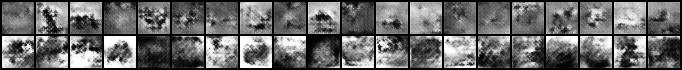

 39%|███▉      | 39/100 [51:45<1:20:38, 79.31s/it]


Generator collapse check: no collapse detected, training shall continue.


---------------------------------------------------------------------------------
# [RAW SPLIT NODE Z] [EPOCH 40/100] [EPOCH TIME INTERVAL: 79.19 sec.] [ATTEMPT 1]
---------------------------------------------------------------------------------
Mean epoch losses/acc for each component in the MGAN: 
{'loss_disc_real': 0.58533, 'acc_disc_real': 0.67732, 'loss_disc_fake': 0.56985, 'acc_disc_fake': 0.74375, 'loss_gen_disc': 1.22761, 'loss_gen_clasf': 0.02818, 'loss_clasf': 0.02887, 'acc_clasf': 0.992}


Sample of generated images from raw split MGAN for node Z (each row for each generator' output):
(This sample is saved at experiment_logs_cifar10_notebook/Z/raw_split/attempt_1_ep_40.jpg)


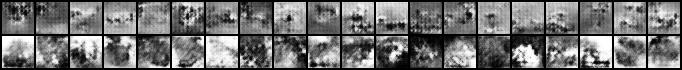

 40%|████      | 40/100 [53:04<1:19:17, 79.29s/it]


Generator collapse check: no collapse detected, training shall continue.


---------------------------------------------------------------------------------
# [RAW SPLIT NODE Z] [EPOCH 41/100] [EPOCH TIME INTERVAL: 79.61 sec.] [ATTEMPT 1]
---------------------------------------------------------------------------------
Mean epoch losses/acc for each component in the MGAN: 
{'loss_disc_real': 0.53408, 'acc_disc_real': 0.71103, 'loss_disc_fake': 0.51556, 'acc_disc_fake': 0.7805, 'loss_gen_disc': 1.23487, 'loss_gen_clasf': 0.02641, 'loss_clasf': 0.0269, 'acc_clasf': 0.99225}


Sample of generated images from raw split MGAN for node Z (each row for each generator' output):
(This sample is saved at experiment_logs_cifar10_notebook/Z/raw_split/attempt_1_ep_41.jpg)


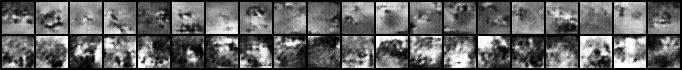

 41%|████      | 41/100 [54:24<1:18:04, 79.40s/it]


Generator collapse check: no collapse detected, training shall continue.


---------------------------------------------------------------------------------
# [RAW SPLIT NODE Z] [EPOCH 42/100] [EPOCH TIME INTERVAL: 79.05 sec.] [ATTEMPT 1]
---------------------------------------------------------------------------------
Mean epoch losses/acc for each component in the MGAN: 
{'loss_disc_real': 0.55779, 'acc_disc_real': 0.69023, 'loss_disc_fake': 0.53351, 'acc_disc_fake': 0.76242, 'loss_gen_disc': 1.25725, 'loss_gen_clasf': 0.02746, 'loss_clasf': 0.0282, 'acc_clasf': 0.99225}


Sample of generated images from raw split MGAN for node Z (each row for each generator' output):
(This sample is saved at experiment_logs_cifar10_notebook/Z/raw_split/attempt_1_ep_42.jpg)


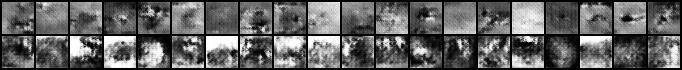

 42%|████▏     | 42/100 [55:43<1:16:39, 79.31s/it]


Generator collapse check: no collapse detected, training shall continue.


---------------------------------------------------------------------------------
# [RAW SPLIT NODE Z] [EPOCH 43/100] [EPOCH TIME INTERVAL: 79.12 sec.] [ATTEMPT 1]
---------------------------------------------------------------------------------
Mean epoch losses/acc for each component in the MGAN: 
{'loss_disc_real': 0.58512, 'acc_disc_real': 0.68452, 'loss_disc_fake': 0.56878, 'acc_disc_fake': 0.74408, 'loss_gen_disc': 1.26589, 'loss_gen_clasf': 0.03089, 'loss_clasf': 0.03192, 'acc_clasf': 0.99008}


Sample of generated images from raw split MGAN for node Z (each row for each generator' output):
(This sample is saved at experiment_logs_cifar10_notebook/Z/raw_split/attempt_1_ep_43.jpg)


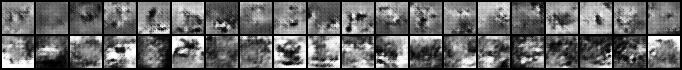

 43%|████▎     | 43/100 [57:02<1:15:18, 79.27s/it]


Generator collapse check: no collapse detected, training shall continue.


---------------------------------------------------------------------------------
# [RAW SPLIT NODE Z] [EPOCH 44/100] [EPOCH TIME INTERVAL: 78.94 sec.] [ATTEMPT 1]
---------------------------------------------------------------------------------
Mean epoch losses/acc for each component in the MGAN: 
{'loss_disc_real': 0.54197, 'acc_disc_real': 0.70245, 'loss_disc_fake': 0.52394, 'acc_disc_fake': 0.76483, 'loss_gen_disc': 1.26163, 'loss_gen_clasf': 0.03335, 'loss_clasf': 0.03418, 'acc_clasf': 0.98958}


Sample of generated images from raw split MGAN for node Z (each row for each generator' output):
(This sample is saved at experiment_logs_cifar10_notebook/Z/raw_split/attempt_1_ep_44.jpg)


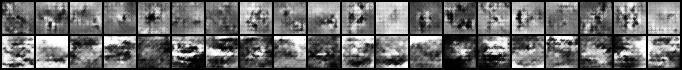

 44%|████▍     | 44/100 [58:21<1:13:54, 79.18s/it]


Generator collapse check: no collapse detected, training shall continue.


---------------------------------------------------------------------------------
# [RAW SPLIT NODE Z] [EPOCH 45/100] [EPOCH TIME INTERVAL: 79.03 sec.] [ATTEMPT 1]
---------------------------------------------------------------------------------
Mean epoch losses/acc for each component in the MGAN: 
{'loss_disc_real': 0.53861, 'acc_disc_real': 0.70362, 'loss_disc_fake': 0.5145, 'acc_disc_fake': 0.7745, 'loss_gen_disc': 1.27963, 'loss_gen_clasf': 0.03061, 'loss_clasf': 0.03124, 'acc_clasf': 0.99067}


Sample of generated images from raw split MGAN for node Z (each row for each generator' output):
(This sample is saved at experiment_logs_cifar10_notebook/Z/raw_split/attempt_1_ep_45.jpg)


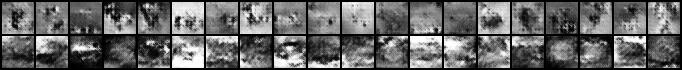

 45%|████▌     | 45/100 [59:40<1:12:33, 79.15s/it]


Generator collapse check: no collapse detected, training shall continue.


---------------------------------------------------------------------------------
# [RAW SPLIT NODE Z] [EPOCH 46/100] [EPOCH TIME INTERVAL: 79.65 sec.] [ATTEMPT 1]
---------------------------------------------------------------------------------
Mean epoch losses/acc for each component in the MGAN: 
{'loss_disc_real': 0.53746, 'acc_disc_real': 0.70308, 'loss_disc_fake': 0.51921, 'acc_disc_fake': 0.76792, 'loss_gen_disc': 1.29221, 'loss_gen_clasf': 0.03307, 'loss_clasf': 0.03386, 'acc_clasf': 0.99133}


Sample of generated images from raw split MGAN for node Z (each row for each generator' output):
(This sample is saved at experiment_logs_cifar10_notebook/Z/raw_split/attempt_1_ep_46.jpg)


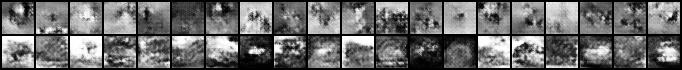

 46%|████▌     | 46/100 [1:01:00<1:11:22, 79.31s/it]


Generator collapse check: no collapse detected, training shall continue.


---------------------------------------------------------------------------------
# [RAW SPLIT NODE Z] [EPOCH 47/100] [EPOCH TIME INTERVAL: 79.13 sec.] [ATTEMPT 1]
---------------------------------------------------------------------------------
Mean epoch losses/acc for each component in the MGAN: 
{'loss_disc_real': 0.54555, 'acc_disc_real': 0.69935, 'loss_disc_fake': 0.51181, 'acc_disc_fake': 0.7685, 'loss_gen_disc': 1.27492, 'loss_gen_clasf': 0.0364, 'loss_clasf': 0.03778, 'acc_clasf': 0.98892}


Sample of generated images from raw split MGAN for node Z (each row for each generator' output):
(This sample is saved at experiment_logs_cifar10_notebook/Z/raw_split/attempt_1_ep_47.jpg)


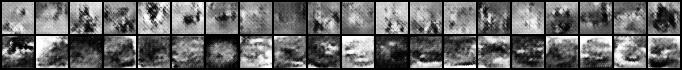

 47%|████▋     | 47/100 [1:02:19<1:10:01, 79.27s/it]


Generator collapse check: no collapse detected, training shall continue.


---------------------------------------------------------------------------------
# [RAW SPLIT NODE Z] [EPOCH 48/100] [EPOCH TIME INTERVAL: 79.24 sec.] [ATTEMPT 1]
---------------------------------------------------------------------------------
Mean epoch losses/acc for each component in the MGAN: 
{'loss_disc_real': 0.54834, 'acc_disc_real': 0.6991, 'loss_disc_fake': 0.52796, 'acc_disc_fake': 0.7585, 'loss_gen_disc': 1.30325, 'loss_gen_clasf': 0.04209, 'loss_clasf': 0.04337, 'acc_clasf': 0.98825}


Sample of generated images from raw split MGAN for node Z (each row for each generator' output):
(This sample is saved at experiment_logs_cifar10_notebook/Z/raw_split/attempt_1_ep_48.jpg)


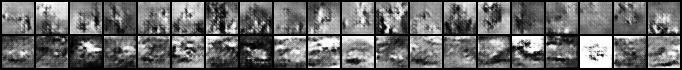

 48%|████▊     | 48/100 [1:03:38<1:08:42, 79.27s/it]


Generator collapse check: no collapse detected, training shall continue.


---------------------------------------------------------------------------------
# [RAW SPLIT NODE Z] [EPOCH 49/100] [EPOCH TIME INTERVAL: 79.15 sec.] [ATTEMPT 1]
---------------------------------------------------------------------------------
Mean epoch losses/acc for each component in the MGAN: 
{'loss_disc_real': 0.54727, 'acc_disc_real': 0.69197, 'loss_disc_fake': 0.52103, 'acc_disc_fake': 0.76625, 'loss_gen_disc': 1.28434, 'loss_gen_clasf': 0.0399, 'loss_clasf': 0.04124, 'acc_clasf': 0.98858}


Sample of generated images from raw split MGAN for node Z (each row for each generator' output):
(This sample is saved at experiment_logs_cifar10_notebook/Z/raw_split/attempt_1_ep_49.jpg)


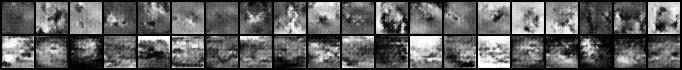

 49%|████▉     | 49/100 [1:04:57<1:07:21, 79.25s/it]


Generator collapse check: no collapse detected, training shall continue.


---------------------------------------------------------------------------------
# [RAW SPLIT NODE Z] [EPOCH 50/100] [EPOCH TIME INTERVAL: 79.06 sec.] [ATTEMPT 1]
---------------------------------------------------------------------------------
Mean epoch losses/acc for each component in the MGAN: 
{'loss_disc_real': 0.54033, 'acc_disc_real': 0.70333, 'loss_disc_fake': 0.51931, 'acc_disc_fake': 0.76875, 'loss_gen_disc': 1.29258, 'loss_gen_clasf': 0.04089, 'loss_clasf': 0.04209, 'acc_clasf': 0.98683}


Sample of generated images from raw split MGAN for node Z (each row for each generator' output):
(This sample is saved at experiment_logs_cifar10_notebook/Z/raw_split/attempt_1_ep_50.jpg)


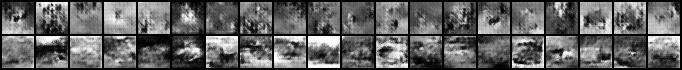

 50%|█████     | 50/100 [1:06:17<1:06:00, 79.20s/it]


Generator collapse check: no collapse detected, training shall continue.


---------------------------------------------------------------------------------
# [RAW SPLIT NODE Z] [EPOCH 51/100] [EPOCH TIME INTERVAL: 79.20 sec.] [ATTEMPT 1]
---------------------------------------------------------------------------------
Mean epoch losses/acc for each component in the MGAN: 
{'loss_disc_real': 0.55616, 'acc_disc_real': 0.69523, 'loss_disc_fake': 0.53545, 'acc_disc_fake': 0.74817, 'loss_gen_disc': 1.32253, 'loss_gen_clasf': 0.03953, 'loss_clasf': 0.0412, 'acc_clasf': 0.989}


Sample of generated images from raw split MGAN for node Z (each row for each generator' output):
(This sample is saved at experiment_logs_cifar10_notebook/Z/raw_split/attempt_1_ep_51.jpg)


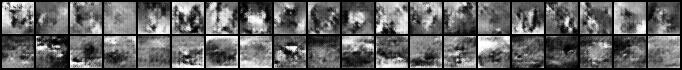

 51%|█████     | 51/100 [1:07:36<1:04:41, 79.22s/it]


Generator collapse check: no collapse detected, training shall continue.


---------------------------------------------------------------------------------
# [RAW SPLIT NODE Z] [EPOCH 52/100] [EPOCH TIME INTERVAL: 79.53 sec.] [ATTEMPT 1]
---------------------------------------------------------------------------------
Mean epoch losses/acc for each component in the MGAN: 
{'loss_disc_real': 0.54001, 'acc_disc_real': 0.70892, 'loss_disc_fake': 0.52227, 'acc_disc_fake': 0.76192, 'loss_gen_disc': 1.28496, 'loss_gen_clasf': 0.0447, 'loss_clasf': 0.04612, 'acc_clasf': 0.98475}


Sample of generated images from raw split MGAN for node Z (each row for each generator' output):
(This sample is saved at experiment_logs_cifar10_notebook/Z/raw_split/attempt_1_ep_52.jpg)


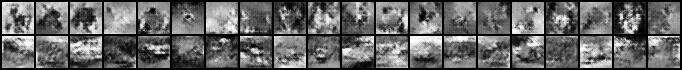

 52%|█████▏    | 52/100 [1:08:55<1:03:27, 79.32s/it]


Generator collapse check: no collapse detected, training shall continue.


---------------------------------------------------------------------------------
# [RAW SPLIT NODE Z] [EPOCH 53/100] [EPOCH TIME INTERVAL: 79.38 sec.] [ATTEMPT 1]
---------------------------------------------------------------------------------
Mean epoch losses/acc for each component in the MGAN: 
{'loss_disc_real': 0.53706, 'acc_disc_real': 0.7144, 'loss_disc_fake': 0.51604, 'acc_disc_fake': 0.76483, 'loss_gen_disc': 1.29025, 'loss_gen_clasf': 0.03928, 'loss_clasf': 0.04031, 'acc_clasf': 0.98683}


Sample of generated images from raw split MGAN for node Z (each row for each generator' output):
(This sample is saved at experiment_logs_cifar10_notebook/Z/raw_split/attempt_1_ep_53.jpg)


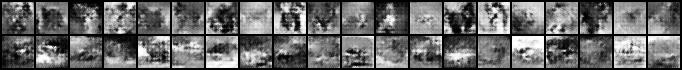

 53%|█████▎    | 53/100 [1:10:15<1:02:09, 79.35s/it]


Generator collapse check: no collapse detected, training shall continue.


---------------------------------------------------------------------------------
# [RAW SPLIT NODE Z] [EPOCH 54/100] [EPOCH TIME INTERVAL: 79.08 sec.] [ATTEMPT 1]
---------------------------------------------------------------------------------
Mean epoch losses/acc for each component in the MGAN: 
{'loss_disc_real': 0.53877, 'acc_disc_real': 0.71217, 'loss_disc_fake': 0.51689, 'acc_disc_fake': 0.764, 'loss_gen_disc': 1.29945, 'loss_gen_clasf': 0.04372, 'loss_clasf': 0.04496, 'acc_clasf': 0.98492}


Sample of generated images from raw split MGAN for node Z (each row for each generator' output):
(This sample is saved at experiment_logs_cifar10_notebook/Z/raw_split/attempt_1_ep_54.jpg)


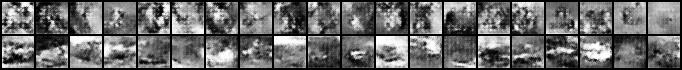

 54%|█████▍    | 54/100 [1:11:34<1:00:46, 79.28s/it]


Generator collapse check: no collapse detected, training shall continue.


---------------------------------------------------------------------------------
# [RAW SPLIT NODE Z] [EPOCH 55/100] [EPOCH TIME INTERVAL: 79.12 sec.] [ATTEMPT 1]
---------------------------------------------------------------------------------
Mean epoch losses/acc for each component in the MGAN: 
{'loss_disc_real': 0.53215, 'acc_disc_real': 0.7199, 'loss_disc_fake': 0.50986, 'acc_disc_fake': 0.76692, 'loss_gen_disc': 1.32556, 'loss_gen_clasf': 0.04516, 'loss_clasf': 0.04625, 'acc_clasf': 0.98433}


Sample of generated images from raw split MGAN for node Z (each row for each generator' output):
(This sample is saved at experiment_logs_cifar10_notebook/Z/raw_split/attempt_1_ep_55.jpg)


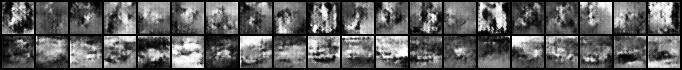

 55%|█████▌    | 55/100 [1:12:53<59:26, 79.25s/it]  


Generator collapse check: no collapse detected, training shall continue.


---------------------------------------------------------------------------------
# [RAW SPLIT NODE Z] [EPOCH 56/100] [EPOCH TIME INTERVAL: 79.13 sec.] [ATTEMPT 1]
---------------------------------------------------------------------------------
Mean epoch losses/acc for each component in the MGAN: 
{'loss_disc_real': 0.54621, 'acc_disc_real': 0.70872, 'loss_disc_fake': 0.5212, 'acc_disc_fake': 0.75133, 'loss_gen_disc': 1.36986, 'loss_gen_clasf': 0.04921, 'loss_clasf': 0.0511, 'acc_clasf': 0.98175}


Sample of generated images from raw split MGAN for node Z (each row for each generator' output):
(This sample is saved at experiment_logs_cifar10_notebook/Z/raw_split/attempt_1_ep_56.jpg)


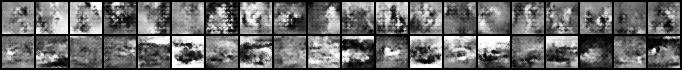

 56%|█████▌    | 56/100 [1:14:12<58:05, 79.22s/it]


Generator collapse check: no collapse detected, training shall continue.


---------------------------------------------------------------------------------
# [RAW SPLIT NODE Z] [EPOCH 57/100] [EPOCH TIME INTERVAL: 79.30 sec.] [ATTEMPT 1]
---------------------------------------------------------------------------------
Mean epoch losses/acc for each component in the MGAN: 
{'loss_disc_real': 0.52534, 'acc_disc_real': 0.72432, 'loss_disc_fake': 0.50303, 'acc_disc_fake': 0.77375, 'loss_gen_disc': 1.38036, 'loss_gen_clasf': 0.05049, 'loss_clasf': 0.05222, 'acc_clasf': 0.98008}


Sample of generated images from raw split MGAN for node Z (each row for each generator' output):
(This sample is saved at experiment_logs_cifar10_notebook/Z/raw_split/attempt_1_ep_57.jpg)


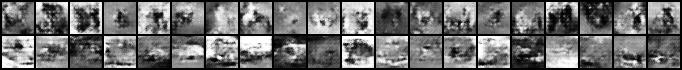

 57%|█████▋    | 57/100 [1:15:32<56:48, 79.26s/it]


Generator collapse check: no collapse detected, training shall continue.


---------------------------------------------------------------------------------
# [RAW SPLIT NODE Z] [EPOCH 58/100] [EPOCH TIME INTERVAL: 79.58 sec.] [ATTEMPT 1]
---------------------------------------------------------------------------------
Mean epoch losses/acc for each component in the MGAN: 
{'loss_disc_real': 0.53339, 'acc_disc_real': 0.722, 'loss_disc_fake': 0.51605, 'acc_disc_fake': 0.77283, 'loss_gen_disc': 1.35967, 'loss_gen_clasf': 0.05114, 'loss_clasf': 0.05272, 'acc_clasf': 0.98083}


Sample of generated images from raw split MGAN for node Z (each row for each generator' output):
(This sample is saved at experiment_logs_cifar10_notebook/Z/raw_split/attempt_1_ep_58.jpg)


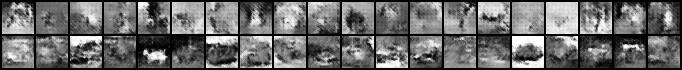

 58%|█████▊    | 58/100 [1:16:51<55:33, 79.37s/it]


Generator collapse check: no collapse detected, training shall continue.


---------------------------------------------------------------------------------
# [RAW SPLIT NODE Z] [EPOCH 59/100] [EPOCH TIME INTERVAL: 79.15 sec.] [ATTEMPT 1]
---------------------------------------------------------------------------------
Mean epoch losses/acc for each component in the MGAN: 
{'loss_disc_real': 0.50999, 'acc_disc_real': 0.73793, 'loss_disc_fake': 0.48346, 'acc_disc_fake': 0.79717, 'loss_gen_disc': 1.3811, 'loss_gen_clasf': 0.03982, 'loss_clasf': 0.04096, 'acc_clasf': 0.98508}


Sample of generated images from raw split MGAN for node Z (each row for each generator' output):
(This sample is saved at experiment_logs_cifar10_notebook/Z/raw_split/attempt_1_ep_59.jpg)


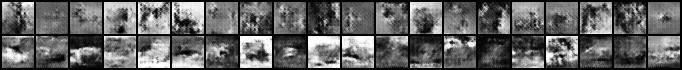

 59%|█████▉    | 59/100 [1:18:10<54:11, 79.31s/it]


Generator collapse check: no collapse detected, training shall continue.


---------------------------------------------------------------------------------
# [RAW SPLIT NODE Z] [EPOCH 60/100] [EPOCH TIME INTERVAL: 79.06 sec.] [ATTEMPT 1]
---------------------------------------------------------------------------------
Mean epoch losses/acc for each component in the MGAN: 
{'loss_disc_real': 0.53658, 'acc_disc_real': 0.7223, 'loss_disc_fake': 0.51424, 'acc_disc_fake': 0.76467, 'loss_gen_disc': 1.38875, 'loss_gen_clasf': 0.0419, 'loss_clasf': 0.04326, 'acc_clasf': 0.98475}


Sample of generated images from raw split MGAN for node Z (each row for each generator' output):
(This sample is saved at experiment_logs_cifar10_notebook/Z/raw_split/attempt_1_ep_60.jpg)


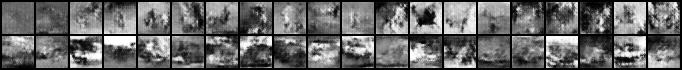

 60%|██████    | 60/100 [1:19:30<52:49, 79.25s/it]


Generator collapse check: no collapse detected, training shall continue.


---------------------------------------------------------------------------------
# [RAW SPLIT NODE Z] [EPOCH 61/100] [EPOCH TIME INTERVAL: 79.09 sec.] [ATTEMPT 1]
---------------------------------------------------------------------------------
Mean epoch losses/acc for each component in the MGAN: 
{'loss_disc_real': 0.51032, 'acc_disc_real': 0.73552, 'loss_disc_fake': 0.48974, 'acc_disc_fake': 0.78325, 'loss_gen_disc': 1.38354, 'loss_gen_clasf': 0.03918, 'loss_clasf': 0.04026, 'acc_clasf': 0.98617}


Sample of generated images from raw split MGAN for node Z (each row for each generator' output):
(This sample is saved at experiment_logs_cifar10_notebook/Z/raw_split/attempt_1_ep_61.jpg)


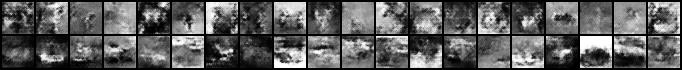

 61%|██████    | 61/100 [1:20:49<51:29, 79.21s/it]


Generator collapse check: no collapse detected, training shall continue.


---------------------------------------------------------------------------------
# [RAW SPLIT NODE Z] [EPOCH 62/100] [EPOCH TIME INTERVAL: 79.19 sec.] [ATTEMPT 1]
---------------------------------------------------------------------------------
Mean epoch losses/acc for each component in the MGAN: 
{'loss_disc_real': 0.51787, 'acc_disc_real': 0.73193, 'loss_disc_fake': 0.49778, 'acc_disc_fake': 0.7775, 'loss_gen_disc': 1.39935, 'loss_gen_clasf': 0.03952, 'loss_clasf': 0.04046, 'acc_clasf': 0.986}


Sample of generated images from raw split MGAN for node Z (each row for each generator' output):
(This sample is saved at experiment_logs_cifar10_notebook/Z/raw_split/attempt_1_ep_62.jpg)


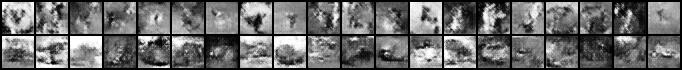

 62%|██████▏   | 62/100 [1:22:08<50:10, 79.22s/it]


Generator collapse check: no collapse detected, training shall continue.


---------------------------------------------------------------------------------
# [RAW SPLIT NODE Z] [EPOCH 63/100] [EPOCH TIME INTERVAL: 79.20 sec.] [ATTEMPT 1]
---------------------------------------------------------------------------------
Mean epoch losses/acc for each component in the MGAN: 
{'loss_disc_real': 0.50645, 'acc_disc_real': 0.74055, 'loss_disc_fake': 0.48586, 'acc_disc_fake': 0.78792, 'loss_gen_disc': 1.40987, 'loss_gen_clasf': 0.04256, 'loss_clasf': 0.04359, 'acc_clasf': 0.98517}


Sample of generated images from raw split MGAN for node Z (each row for each generator' output):
(This sample is saved at experiment_logs_cifar10_notebook/Z/raw_split/attempt_1_ep_63.jpg)


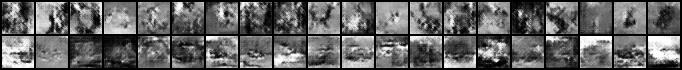

 63%|██████▎   | 63/100 [1:23:27<48:51, 79.23s/it]


Generator collapse check: no collapse detected, training shall continue.


---------------------------------------------------------------------------------
# [RAW SPLIT NODE Z] [EPOCH 64/100] [EPOCH TIME INTERVAL: 79.50 sec.] [ATTEMPT 1]
---------------------------------------------------------------------------------
Mean epoch losses/acc for each component in the MGAN: 
{'loss_disc_real': 0.55657, 'acc_disc_real': 0.70773, 'loss_disc_fake': 0.5432, 'acc_disc_fake': 0.75767, 'loss_gen_disc': 1.36509, 'loss_gen_clasf': 0.04688, 'loss_clasf': 0.04966, 'acc_clasf': 0.98233}


Sample of generated images from raw split MGAN for node Z (each row for each generator' output):
(This sample is saved at experiment_logs_cifar10_notebook/Z/raw_split/attempt_1_ep_64.jpg)


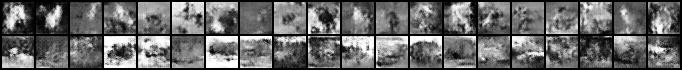

 64%|██████▍   | 64/100 [1:24:47<47:35, 79.32s/it]


Generator collapse check: no collapse detected, training shall continue.


---------------------------------------------------------------------------------
# [RAW SPLIT NODE Z] [EPOCH 65/100] [EPOCH TIME INTERVAL: 79.82 sec.] [ATTEMPT 1]
---------------------------------------------------------------------------------
Mean epoch losses/acc for each component in the MGAN: 
{'loss_disc_real': 0.49576, 'acc_disc_real': 0.75153, 'loss_disc_fake': 0.47454, 'acc_disc_fake': 0.80192, 'loss_gen_disc': 1.39752, 'loss_gen_clasf': 0.04441, 'loss_clasf': 0.04558, 'acc_clasf': 0.98242}


Sample of generated images from raw split MGAN for node Z (each row for each generator' output):
(This sample is saved at experiment_logs_cifar10_notebook/Z/raw_split/attempt_1_ep_65.jpg)


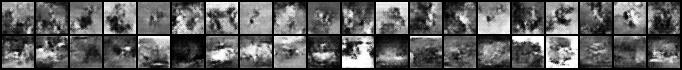

 65%|██████▌   | 65/100 [1:26:07<46:21, 79.48s/it]


Generator collapse check: no collapse detected, training shall continue.


---------------------------------------------------------------------------------
# [RAW SPLIT NODE Z] [EPOCH 66/100] [EPOCH TIME INTERVAL: 79.49 sec.] [ATTEMPT 1]
---------------------------------------------------------------------------------
Mean epoch losses/acc for each component in the MGAN: 
{'loss_disc_real': 0.49668, 'acc_disc_real': 0.74743, 'loss_disc_fake': 0.47704, 'acc_disc_fake': 0.79842, 'loss_gen_disc': 1.42268, 'loss_gen_clasf': 0.04165, 'loss_clasf': 0.04254, 'acc_clasf': 0.985}


Sample of generated images from raw split MGAN for node Z (each row for each generator' output):
(This sample is saved at experiment_logs_cifar10_notebook/Z/raw_split/attempt_1_ep_66.jpg)


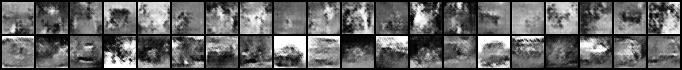

 66%|██████▌   | 66/100 [1:27:26<45:02, 79.50s/it]


Generator collapse check: no collapse detected, training shall continue.


---------------------------------------------------------------------------------
# [RAW SPLIT NODE Z] [EPOCH 67/100] [EPOCH TIME INTERVAL: 79.18 sec.] [ATTEMPT 1]
---------------------------------------------------------------------------------
Mean epoch losses/acc for each component in the MGAN: 
{'loss_disc_real': 0.53422, 'acc_disc_real': 0.7253, 'loss_disc_fake': 0.51281, 'acc_disc_fake': 0.77358, 'loss_gen_disc': 1.41464, 'loss_gen_clasf': 0.05037, 'loss_clasf': 0.05385, 'acc_clasf': 0.98033}


Sample of generated images from raw split MGAN for node Z (each row for each generator' output):
(This sample is saved at experiment_logs_cifar10_notebook/Z/raw_split/attempt_1_ep_67.jpg)


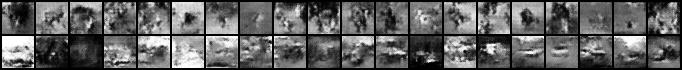

 67%|██████▋   | 67/100 [1:28:45<43:40, 79.41s/it]


Generator collapse check: no collapse detected, training shall continue.


---------------------------------------------------------------------------------
# [RAW SPLIT NODE Z] [EPOCH 68/100] [EPOCH TIME INTERVAL: 79.66 sec.] [ATTEMPT 1]
---------------------------------------------------------------------------------
Mean epoch losses/acc for each component in the MGAN: 
{'loss_disc_real': 0.49753, 'acc_disc_real': 0.74935, 'loss_disc_fake': 0.47834, 'acc_disc_fake': 0.79875, 'loss_gen_disc': 1.40679, 'loss_gen_clasf': 0.03804, 'loss_clasf': 0.03896, 'acc_clasf': 0.986}


Sample of generated images from raw split MGAN for node Z (each row for each generator' output):
(This sample is saved at experiment_logs_cifar10_notebook/Z/raw_split/attempt_1_ep_68.jpg)


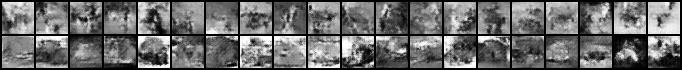

 68%|██████▊   | 68/100 [1:30:05<42:24, 79.50s/it]


Generator collapse check: no collapse detected, training shall continue.


---------------------------------------------------------------------------------
# [RAW SPLIT NODE Z] [EPOCH 69/100] [EPOCH TIME INTERVAL: 79.28 sec.] [ATTEMPT 1]
---------------------------------------------------------------------------------
Mean epoch losses/acc for each component in the MGAN: 
{'loss_disc_real': 0.50465, 'acc_disc_real': 0.74447, 'loss_disc_fake': 0.47798, 'acc_disc_fake': 0.78942, 'loss_gen_disc': 1.45213, 'loss_gen_clasf': 0.0433, 'loss_clasf': 0.04476, 'acc_clasf': 0.98492}


Sample of generated images from raw split MGAN for node Z (each row for each generator' output):
(This sample is saved at experiment_logs_cifar10_notebook/Z/raw_split/attempt_1_ep_69.jpg)


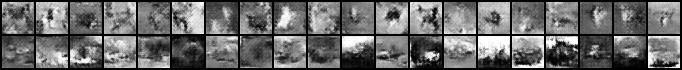

 69%|██████▉   | 69/100 [1:31:24<41:02, 79.44s/it]


Generator collapse check: no collapse detected, training shall continue.


---------------------------------------------------------------------------------
# [RAW SPLIT NODE Z] [EPOCH 70/100] [EPOCH TIME INTERVAL: 79.35 sec.] [ATTEMPT 1]
---------------------------------------------------------------------------------
Mean epoch losses/acc for each component in the MGAN: 
{'loss_disc_real': 0.49692, 'acc_disc_real': 0.74722, 'loss_disc_fake': 0.47029, 'acc_disc_fake': 0.80117, 'loss_gen_disc': 1.43318, 'loss_gen_clasf': 0.03905, 'loss_clasf': 0.04001, 'acc_clasf': 0.98658}


Sample of generated images from raw split MGAN for node Z (each row for each generator' output):
(This sample is saved at experiment_logs_cifar10_notebook/Z/raw_split/attempt_1_ep_70.jpg)


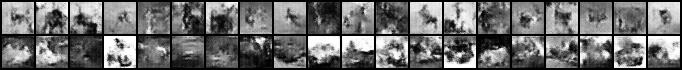

 70%|███████   | 70/100 [1:32:44<39:42, 79.43s/it]


Generator collapse check: no collapse detected, training shall continue.


---------------------------------------------------------------------------------
# [RAW SPLIT NODE Z] [EPOCH 71/100] [EPOCH TIME INTERVAL: 79.26 sec.] [ATTEMPT 1]
---------------------------------------------------------------------------------
Mean epoch losses/acc for each component in the MGAN: 
{'loss_disc_real': 0.58568, 'acc_disc_real': 0.67327, 'loss_disc_fake': 0.63977, 'acc_disc_fake': 0.71308, 'loss_gen_disc': 1.246, 'loss_gen_clasf': 0.05632, 'loss_clasf': 0.0613, 'acc_clasf': 0.981}


Sample of generated images from raw split MGAN for node Z (each row for each generator' output):
(This sample is saved at experiment_logs_cifar10_notebook/Z/raw_split/attempt_1_ep_71.jpg)


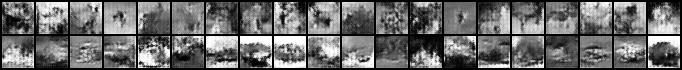

 71%|███████   | 71/100 [1:34:03<38:22, 79.39s/it]


Generator collapse check: no collapse detected, training shall continue.


---------------------------------------------------------------------------------
# [RAW SPLIT NODE Z] [EPOCH 72/100] [EPOCH TIME INTERVAL: 79.08 sec.] [ATTEMPT 1]
---------------------------------------------------------------------------------
Mean epoch losses/acc for each component in the MGAN: 
{'loss_disc_real': 0.58583, 'acc_disc_real': 0.67868, 'loss_disc_fake': 0.56326, 'acc_disc_fake': 0.74175, 'loss_gen_disc': 1.08061, 'loss_gen_clasf': 0.0449, 'loss_clasf': 0.04596, 'acc_clasf': 0.98942}


Sample of generated images from raw split MGAN for node Z (each row for each generator' output):
(This sample is saved at experiment_logs_cifar10_notebook/Z/raw_split/attempt_1_ep_72.jpg)


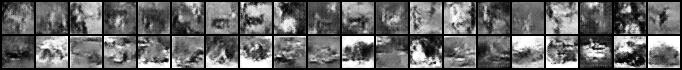

 72%|███████▏  | 72/100 [1:35:22<37:00, 79.31s/it]


Generator collapse check: no collapse detected, training shall continue.


---------------------------------------------------------------------------------
# [RAW SPLIT NODE Z] [EPOCH 73/100] [EPOCH TIME INTERVAL: 79.12 sec.] [ATTEMPT 1]
---------------------------------------------------------------------------------
Mean epoch losses/acc for each component in the MGAN: 
{'loss_disc_real': 0.50983, 'acc_disc_real': 0.73797, 'loss_disc_fake': 0.48899, 'acc_disc_fake': 0.7885, 'loss_gen_disc': 1.39363, 'loss_gen_clasf': 0.03613, 'loss_clasf': 0.0367, 'acc_clasf': 0.98908}


Sample of generated images from raw split MGAN for node Z (each row for each generator' output):
(This sample is saved at experiment_logs_cifar10_notebook/Z/raw_split/attempt_1_ep_73.jpg)


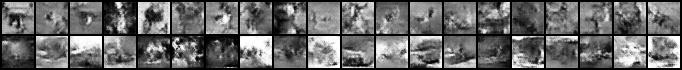

 73%|███████▎  | 73/100 [1:36:41<35:40, 79.26s/it]


Generator collapse check: no collapse detected, training shall continue.


---------------------------------------------------------------------------------
# [RAW SPLIT NODE Z] [EPOCH 74/100] [EPOCH TIME INTERVAL: 79.18 sec.] [ATTEMPT 1]
---------------------------------------------------------------------------------
Mean epoch losses/acc for each component in the MGAN: 
{'loss_disc_real': 0.54237, 'acc_disc_real': 0.7172, 'loss_disc_fake': 0.51769, 'acc_disc_fake': 0.7585, 'loss_gen_disc': 1.45874, 'loss_gen_clasf': 0.04485, 'loss_clasf': 0.04708, 'acc_clasf': 0.983}


Sample of generated images from raw split MGAN for node Z (each row for each generator' output):
(This sample is saved at experiment_logs_cifar10_notebook/Z/raw_split/attempt_1_ep_74.jpg)


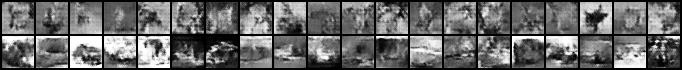

 74%|███████▍  | 74/100 [1:38:00<34:20, 79.25s/it]


Generator collapse check: no collapse detected, training shall continue.


---------------------------------------------------------------------------------
# [RAW SPLIT NODE Z] [EPOCH 75/100] [EPOCH TIME INTERVAL: 79.22 sec.] [ATTEMPT 1]
---------------------------------------------------------------------------------
Mean epoch losses/acc for each component in the MGAN: 
{'loss_disc_real': 0.48605, 'acc_disc_real': 0.76013, 'loss_disc_fake': 0.46149, 'acc_disc_fake': 0.81642, 'loss_gen_disc': 1.42419, 'loss_gen_clasf': 0.03561, 'loss_clasf': 0.03629, 'acc_clasf': 0.98892}


Sample of generated images from raw split MGAN for node Z (each row for each generator' output):
(This sample is saved at experiment_logs_cifar10_notebook/Z/raw_split/attempt_1_ep_75.jpg)


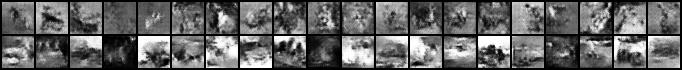

 75%|███████▌  | 75/100 [1:39:20<33:01, 79.25s/it]


Generator collapse check: no collapse detected, training shall continue.


---------------------------------------------------------------------------------
# [RAW SPLIT NODE Z] [EPOCH 76/100] [EPOCH TIME INTERVAL: 79.44 sec.] [ATTEMPT 1]
---------------------------------------------------------------------------------
Mean epoch losses/acc for each component in the MGAN: 
{'loss_disc_real': 0.48574, 'acc_disc_real': 0.75698, 'loss_disc_fake': 0.4572, 'acc_disc_fake': 0.81817, 'loss_gen_disc': 1.42466, 'loss_gen_clasf': 0.03169, 'loss_clasf': 0.0324, 'acc_clasf': 0.9895}


Sample of generated images from raw split MGAN for node Z (each row for each generator' output):
(This sample is saved at experiment_logs_cifar10_notebook/Z/raw_split/attempt_1_ep_76.jpg)


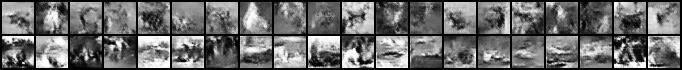

 76%|███████▌  | 76/100 [1:40:39<31:43, 79.32s/it]


Generator collapse check: no collapse detected, training shall continue.


---------------------------------------------------------------------------------
# [RAW SPLIT NODE Z] [EPOCH 77/100] [EPOCH TIME INTERVAL: 79.99 sec.] [ATTEMPT 1]
---------------------------------------------------------------------------------
Mean epoch losses/acc for each component in the MGAN: 
{'loss_disc_real': 0.52539, 'acc_disc_real': 0.73215, 'loss_disc_fake': 0.50972, 'acc_disc_fake': 0.77492, 'loss_gen_disc': 1.44367, 'loss_gen_clasf': 0.04437, 'loss_clasf': 0.04696, 'acc_clasf': 0.98458}


Sample of generated images from raw split MGAN for node Z (each row for each generator' output):
(This sample is saved at experiment_logs_cifar10_notebook/Z/raw_split/attempt_1_ep_77.jpg)


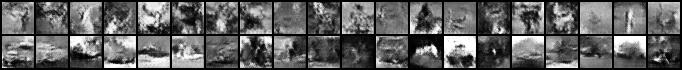

 77%|███████▋  | 77/100 [1:41:59<30:29, 79.53s/it]


Generator collapse check: no collapse detected, training shall continue.


---------------------------------------------------------------------------------
# [RAW SPLIT NODE Z] [EPOCH 78/100] [EPOCH TIME INTERVAL: 80.23 sec.] [ATTEMPT 1]
---------------------------------------------------------------------------------
Mean epoch losses/acc for each component in the MGAN: 
{'loss_disc_real': 0.48426, 'acc_disc_real': 0.75687, 'loss_disc_fake': 0.45463, 'acc_disc_fake': 0.813, 'loss_gen_disc': 1.44406, 'loss_gen_clasf': 0.03001, 'loss_clasf': 0.03053, 'acc_clasf': 0.99192}


Sample of generated images from raw split MGAN for node Z (each row for each generator' output):
(This sample is saved at experiment_logs_cifar10_notebook/Z/raw_split/attempt_1_ep_78.jpg)


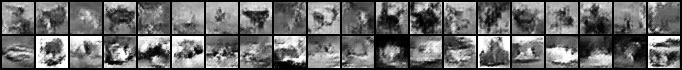

 78%|███████▊  | 78/100 [1:43:20<29:14, 79.76s/it]


Generator collapse check: no collapse detected, training shall continue.


---------------------------------------------------------------------------------
# [RAW SPLIT NODE Z] [EPOCH 79/100] [EPOCH TIME INTERVAL: 80.16 sec.] [ATTEMPT 1]
---------------------------------------------------------------------------------
Mean epoch losses/acc for each component in the MGAN: 
{'loss_disc_real': 0.574, 'acc_disc_real': 0.70947, 'loss_disc_fake': 0.54915, 'acc_disc_fake': 0.75217, 'loss_gen_disc': 1.41918, 'loss_gen_clasf': 0.0472, 'loss_clasf': 0.05068, 'acc_clasf': 0.98425}


Sample of generated images from raw split MGAN for node Z (each row for each generator' output):
(This sample is saved at experiment_logs_cifar10_notebook/Z/raw_split/attempt_1_ep_79.jpg)


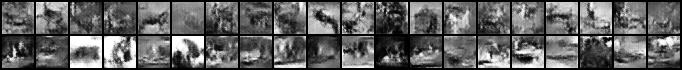

 79%|███████▉  | 79/100 [1:44:40<27:57, 79.89s/it]


Generator collapse check: no collapse detected, training shall continue.


---------------------------------------------------------------------------------
# [RAW SPLIT NODE Z] [EPOCH 80/100] [EPOCH TIME INTERVAL: 80.23 sec.] [ATTEMPT 1]
---------------------------------------------------------------------------------
Mean epoch losses/acc for each component in the MGAN: 
{'loss_disc_real': 0.48705, 'acc_disc_real': 0.75408, 'loss_disc_fake': 0.45535, 'acc_disc_fake': 0.82367, 'loss_gen_disc': 1.4371, 'loss_gen_clasf': 0.02954, 'loss_clasf': 0.03014, 'acc_clasf': 0.99042}


Sample of generated images from raw split MGAN for node Z (each row for each generator' output):
(This sample is saved at experiment_logs_cifar10_notebook/Z/raw_split/attempt_1_ep_80.jpg)


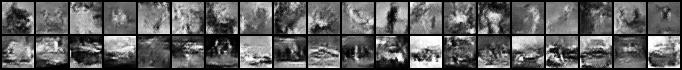

 80%|████████  | 80/100 [1:46:00<26:40, 80.01s/it]


Generator collapse check: no collapse detected, training shall continue.


---------------------------------------------------------------------------------
# [RAW SPLIT NODE Z] [EPOCH 81/100] [EPOCH TIME INTERVAL: 80.06 sec.] [ATTEMPT 1]
---------------------------------------------------------------------------------
Mean epoch losses/acc for each component in the MGAN: 
{'loss_disc_real': 0.47965, 'acc_disc_real': 0.75928, 'loss_disc_fake': 0.4525, 'acc_disc_fake': 0.81433, 'loss_gen_disc': 1.49758, 'loss_gen_clasf': 0.03341, 'loss_clasf': 0.03458, 'acc_clasf': 0.98892}


Sample of generated images from raw split MGAN for node Z (each row for each generator' output):
(This sample is saved at experiment_logs_cifar10_notebook/Z/raw_split/attempt_1_ep_81.jpg)


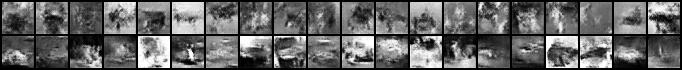

 81%|████████  | 81/100 [1:47:20<25:20, 80.03s/it]


Generator collapse check: no collapse detected, training shall continue.


---------------------------------------------------------------------------------
# [RAW SPLIT NODE Z] [EPOCH 82/100] [EPOCH TIME INTERVAL: 79.78 sec.] [ATTEMPT 1]
---------------------------------------------------------------------------------
Mean epoch losses/acc for each component in the MGAN: 
{'loss_disc_real': 0.55177, 'acc_disc_real': 0.73427, 'loss_disc_fake': 0.52195, 'acc_disc_fake': 0.77242, 'loss_gen_disc': 1.59254, 'loss_gen_clasf': 0.05888, 'loss_clasf': 0.06555, 'acc_clasf': 0.9755}


Sample of generated images from raw split MGAN for node Z (each row for each generator' output):
(This sample is saved at experiment_logs_cifar10_notebook/Z/raw_split/attempt_1_ep_82.jpg)


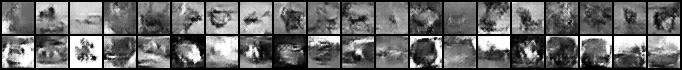

 82%|████████▏ | 82/100 [1:48:40<23:59, 79.97s/it]


Generator collapse check: no collapse detected, training shall continue.


---------------------------------------------------------------------------------
# [RAW SPLIT NODE Z] [EPOCH 83/100] [EPOCH TIME INTERVAL: 79.95 sec.] [ATTEMPT 1]
---------------------------------------------------------------------------------
Mean epoch losses/acc for each component in the MGAN: 
{'loss_disc_real': 0.48423, 'acc_disc_real': 0.75573, 'loss_disc_fake': 0.45461, 'acc_disc_fake': 0.81425, 'loss_gen_disc': 1.50215, 'loss_gen_clasf': 0.02894, 'loss_clasf': 0.02952, 'acc_clasf': 0.99217}


Sample of generated images from raw split MGAN for node Z (each row for each generator' output):
(This sample is saved at experiment_logs_cifar10_notebook/Z/raw_split/attempt_1_ep_83.jpg)


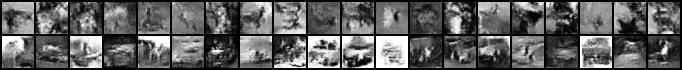

 83%|████████▎ | 83/100 [1:50:00<22:39, 79.98s/it]


Generator collapse check: no collapse detected, training shall continue.


---------------------------------------------------------------------------------
# [RAW SPLIT NODE Z] [EPOCH 84/100] [EPOCH TIME INTERVAL: 80.15 sec.] [ATTEMPT 1]
---------------------------------------------------------------------------------
Mean epoch losses/acc for each component in the MGAN: 
{'loss_disc_real': 0.46846, 'acc_disc_real': 0.76695, 'loss_disc_fake': 0.44525, 'acc_disc_fake': 0.82192, 'loss_gen_disc': 1.52373, 'loss_gen_clasf': 0.0326, 'loss_clasf': 0.03325, 'acc_clasf': 0.98925}


Sample of generated images from raw split MGAN for node Z (each row for each generator' output):
(This sample is saved at experiment_logs_cifar10_notebook/Z/raw_split/attempt_1_ep_84.jpg)


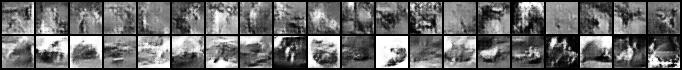

 84%|████████▍ | 84/100 [1:51:20<21:20, 80.04s/it]


Generator collapse check: no collapse detected, training shall continue.


---------------------------------------------------------------------------------
# [RAW SPLIT NODE Z] [EPOCH 85/100] [EPOCH TIME INTERVAL: 79.90 sec.] [ATTEMPT 1]
---------------------------------------------------------------------------------
Mean epoch losses/acc for each component in the MGAN: 
{'loss_disc_real': 0.4739, 'acc_disc_real': 0.76372, 'loss_disc_fake': 0.4429, 'acc_disc_fake': 0.814, 'loss_gen_disc': 1.57973, 'loss_gen_clasf': 0.03454, 'loss_clasf': 0.03575, 'acc_clasf': 0.98925}


Sample of generated images from raw split MGAN for node Z (each row for each generator' output):
(This sample is saved at experiment_logs_cifar10_notebook/Z/raw_split/attempt_1_ep_85.jpg)


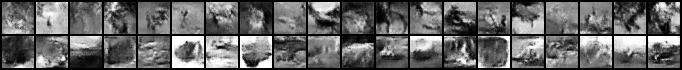

 85%|████████▌ | 85/100 [1:52:40<20:00, 80.01s/it]


Generator collapse check: no collapse detected, training shall continue.


---------------------------------------------------------------------------------
# [RAW SPLIT NODE Z] [EPOCH 86/100] [EPOCH TIME INTERVAL: 80.04 sec.] [ATTEMPT 1]
---------------------------------------------------------------------------------
Mean epoch losses/acc for each component in the MGAN: 
{'loss_disc_real': 0.52008, 'acc_disc_real': 0.7359, 'loss_disc_fake': 0.49817, 'acc_disc_fake': 0.78367, 'loss_gen_disc': 1.53992, 'loss_gen_clasf': 0.04368, 'loss_clasf': 0.04683, 'acc_clasf': 0.98542}


Sample of generated images from raw split MGAN for node Z (each row for each generator' output):
(This sample is saved at experiment_logs_cifar10_notebook/Z/raw_split/attempt_1_ep_86.jpg)


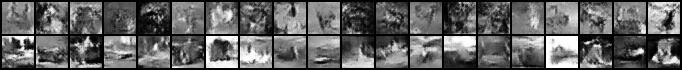

 86%|████████▌ | 86/100 [1:54:00<18:40, 80.03s/it]


Generator collapse check: no collapse detected, training shall continue.


---------------------------------------------------------------------------------
# [RAW SPLIT NODE Z] [EPOCH 87/100] [EPOCH TIME INTERVAL: 79.89 sec.] [ATTEMPT 1]
---------------------------------------------------------------------------------
Mean epoch losses/acc for each component in the MGAN: 
{'loss_disc_real': 0.47288, 'acc_disc_real': 0.76217, 'loss_disc_fake': 0.44846, 'acc_disc_fake': 0.82033, 'loss_gen_disc': 1.48796, 'loss_gen_clasf': 0.03468, 'loss_clasf': 0.03559, 'acc_clasf': 0.98975}


Sample of generated images from raw split MGAN for node Z (each row for each generator' output):
(This sample is saved at experiment_logs_cifar10_notebook/Z/raw_split/attempt_1_ep_87.jpg)


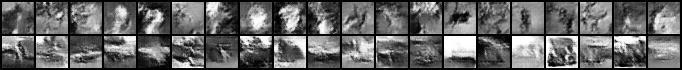

 87%|████████▋ | 87/100 [1:55:20<17:20, 80.00s/it]


Generator collapse check: no collapse detected, training shall continue.


---------------------------------------------------------------------------------
# [RAW SPLIT NODE Z] [EPOCH 88/100] [EPOCH TIME INTERVAL: 79.90 sec.] [ATTEMPT 1]
---------------------------------------------------------------------------------
Mean epoch losses/acc for each component in the MGAN: 
{'loss_disc_real': 0.4773, 'acc_disc_real': 0.76032, 'loss_disc_fake': 0.45633, 'acc_disc_fake': 0.81083, 'loss_gen_disc': 1.59788, 'loss_gen_clasf': 0.04825, 'loss_clasf': 0.04987, 'acc_clasf': 0.98433}


Sample of generated images from raw split MGAN for node Z (each row for each generator' output):
(This sample is saved at experiment_logs_cifar10_notebook/Z/raw_split/attempt_1_ep_88.jpg)


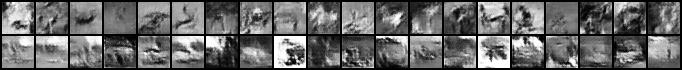

 88%|████████▊ | 88/100 [1:56:40<15:59, 79.98s/it]


Generator collapse check: no collapse detected, training shall continue.


---------------------------------------------------------------------------------
# [RAW SPLIT NODE Z] [EPOCH 89/100] [EPOCH TIME INTERVAL: 79.58 sec.] [ATTEMPT 1]
---------------------------------------------------------------------------------
Mean epoch losses/acc for each component in the MGAN: 
{'loss_disc_real': 0.5532, 'acc_disc_real': 0.7122, 'loss_disc_fake': 0.5417, 'acc_disc_fake': 0.75433, 'loss_gen_disc': 1.53643, 'loss_gen_clasf': 0.06284, 'loss_clasf': 0.07095, 'acc_clasf': 0.978}


Sample of generated images from raw split MGAN for node Z (each row for each generator' output):
(This sample is saved at experiment_logs_cifar10_notebook/Z/raw_split/attempt_1_ep_89.jpg)


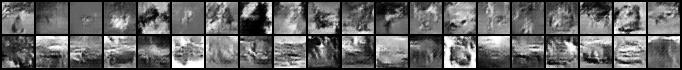

 89%|████████▉ | 89/100 [1:58:00<14:38, 79.88s/it]


Generator collapse check: no collapse detected, training shall continue.


---------------------------------------------------------------------------------
# [RAW SPLIT NODE Z] [EPOCH 90/100] [EPOCH TIME INTERVAL: 79.80 sec.] [ATTEMPT 1]
---------------------------------------------------------------------------------
Mean epoch losses/acc for each component in the MGAN: 
{'loss_disc_real': 0.45522, 'acc_disc_real': 0.77887, 'loss_disc_fake': 0.42988, 'acc_disc_fake': 0.82908, 'loss_gen_disc': 1.60504, 'loss_gen_clasf': 0.0344, 'loss_clasf': 0.03512, 'acc_clasf': 0.99075}


Sample of generated images from raw split MGAN for node Z (each row for each generator' output):
(This sample is saved at experiment_logs_cifar10_notebook/Z/raw_split/attempt_1_ep_90.jpg)


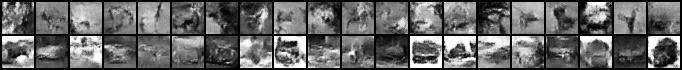

 90%|█████████ | 90/100 [1:59:19<13:18, 79.87s/it]


Generator collapse check: no collapse detected, training shall continue.


---------------------------------------------------------------------------------
# [RAW SPLIT NODE Z] [EPOCH 91/100] [EPOCH TIME INTERVAL: 79.88 sec.] [ATTEMPT 1]
---------------------------------------------------------------------------------
Mean epoch losses/acc for each component in the MGAN: 
{'loss_disc_real': 0.48174, 'acc_disc_real': 0.75528, 'loss_disc_fake': 0.45466, 'acc_disc_fake': 0.80917, 'loss_gen_disc': 1.53328, 'loss_gen_clasf': 0.0391, 'loss_clasf': 0.03998, 'acc_clasf': 0.98733}


Sample of generated images from raw split MGAN for node Z (each row for each generator' output):
(This sample is saved at experiment_logs_cifar10_notebook/Z/raw_split/attempt_1_ep_91.jpg)


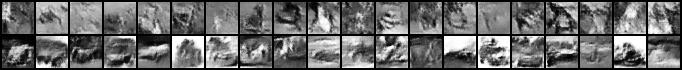

 91%|█████████ | 91/100 [2:00:39<11:58, 79.88s/it]


Generator collapse check: no collapse detected, training shall continue.


---------------------------------------------------------------------------------
# [RAW SPLIT NODE Z] [EPOCH 92/100] [EPOCH TIME INTERVAL: 79.30 sec.] [ATTEMPT 1]
---------------------------------------------------------------------------------
Mean epoch losses/acc for each component in the MGAN: 
{'loss_disc_real': 0.48265, 'acc_disc_real': 0.75713, 'loss_disc_fake': 0.45816, 'acc_disc_fake': 0.80717, 'loss_gen_disc': 1.55854, 'loss_gen_clasf': 0.03887, 'loss_clasf': 0.04051, 'acc_clasf': 0.98767}


Sample of generated images from raw split MGAN for node Z (each row for each generator' output):
(This sample is saved at experiment_logs_cifar10_notebook/Z/raw_split/attempt_1_ep_92.jpg)


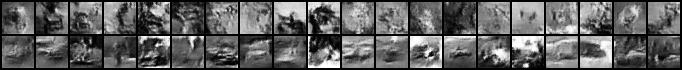

 92%|█████████▏| 92/100 [2:01:59<10:37, 79.72s/it]


Generator collapse check: no collapse detected, training shall continue.


---------------------------------------------------------------------------------
# [RAW SPLIT NODE Z] [EPOCH 93/100] [EPOCH TIME INTERVAL: 79.43 sec.] [ATTEMPT 1]
---------------------------------------------------------------------------------
Mean epoch losses/acc for each component in the MGAN: 
{'loss_disc_real': 0.45102, 'acc_disc_real': 0.78252, 'loss_disc_fake': 0.42626, 'acc_disc_fake': 0.82667, 'loss_gen_disc': 1.59231, 'loss_gen_clasf': 0.02976, 'loss_clasf': 0.03057, 'acc_clasf': 0.99142}


Sample of generated images from raw split MGAN for node Z (each row for each generator' output):
(This sample is saved at experiment_logs_cifar10_notebook/Z/raw_split/attempt_1_ep_93.jpg)


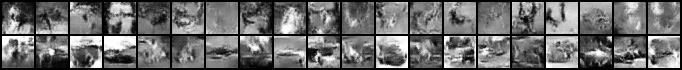

 93%|█████████▎| 93/100 [2:03:18<09:17, 79.65s/it]


Generator collapse check: no collapse detected, training shall continue.


---------------------------------------------------------------------------------
# [RAW SPLIT NODE Z] [EPOCH 94/100] [EPOCH TIME INTERVAL: 79.13 sec.] [ATTEMPT 1]
---------------------------------------------------------------------------------
Mean epoch losses/acc for each component in the MGAN: 
{'loss_disc_real': 0.46003, 'acc_disc_real': 0.7715, 'loss_disc_fake': 0.43261, 'acc_disc_fake': 0.82075, 'loss_gen_disc': 1.56753, 'loss_gen_clasf': 0.03234, 'loss_clasf': 0.03313, 'acc_clasf': 0.98917}


Sample of generated images from raw split MGAN for node Z (each row for each generator' output):
(This sample is saved at experiment_logs_cifar10_notebook/Z/raw_split/attempt_1_ep_94.jpg)


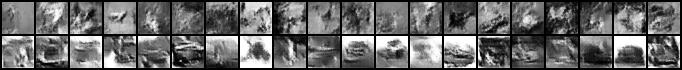

 94%|█████████▍| 94/100 [2:04:37<07:57, 79.50s/it]


Generator collapse check: no collapse detected, training shall continue.


---------------------------------------------------------------------------------
# [RAW SPLIT NODE Z] [EPOCH 95/100] [EPOCH TIME INTERVAL: 79.23 sec.] [ATTEMPT 1]
---------------------------------------------------------------------------------
Mean epoch losses/acc for each component in the MGAN: 
{'loss_disc_real': 0.49115, 'acc_disc_real': 0.75878, 'loss_disc_fake': 0.47864, 'acc_disc_fake': 0.7975, 'loss_gen_disc': 1.62069, 'loss_gen_clasf': 0.04106, 'loss_clasf': 0.04273, 'acc_clasf': 0.98733}


Sample of generated images from raw split MGAN for node Z (each row for each generator' output):
(This sample is saved at experiment_logs_cifar10_notebook/Z/raw_split/attempt_1_ep_95.jpg)


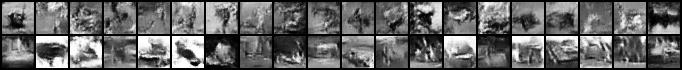

 95%|█████████▌| 95/100 [2:05:57<06:37, 79.43s/it]


Generator collapse check: no collapse detected, training shall continue.


---------------------------------------------------------------------------------
# [RAW SPLIT NODE Z] [EPOCH 96/100] [EPOCH TIME INTERVAL: 79.32 sec.] [ATTEMPT 1]
---------------------------------------------------------------------------------
Mean epoch losses/acc for each component in the MGAN: 
{'loss_disc_real': 0.45616, 'acc_disc_real': 0.77503, 'loss_disc_fake': 0.42771, 'acc_disc_fake': 0.82992, 'loss_gen_disc': 1.64821, 'loss_gen_clasf': 0.03895, 'loss_clasf': 0.03992, 'acc_clasf': 0.98683}


Sample of generated images from raw split MGAN for node Z (each row for each generator' output):
(This sample is saved at experiment_logs_cifar10_notebook/Z/raw_split/attempt_1_ep_96.jpg)


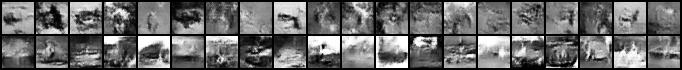

 96%|█████████▌| 96/100 [2:07:16<05:17, 79.41s/it]


Generator collapse check: no collapse detected, training shall continue.


---------------------------------------------------------------------------------
# [RAW SPLIT NODE Z] [EPOCH 97/100] [EPOCH TIME INTERVAL: 79.26 sec.] [ATTEMPT 1]
---------------------------------------------------------------------------------
Mean epoch losses/acc for each component in the MGAN: 
{'loss_disc_real': 0.44303, 'acc_disc_real': 0.78583, 'loss_disc_fake': 0.41397, 'acc_disc_fake': 0.83758, 'loss_gen_disc': 1.62773, 'loss_gen_clasf': 0.02767, 'loss_clasf': 0.02832, 'acc_clasf': 0.992}


Sample of generated images from raw split MGAN for node Z (each row for each generator' output):
(This sample is saved at experiment_logs_cifar10_notebook/Z/raw_split/attempt_1_ep_97.jpg)


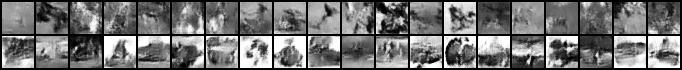

 97%|█████████▋| 97/100 [2:08:35<03:58, 79.38s/it]


Generator collapse check: no collapse detected, training shall continue.


---------------------------------------------------------------------------------
# [RAW SPLIT NODE Z] [EPOCH 98/100] [EPOCH TIME INTERVAL: 79.29 sec.] [ATTEMPT 1]
---------------------------------------------------------------------------------
Mean epoch losses/acc for each component in the MGAN: 
{'loss_disc_real': 0.48948, 'acc_disc_real': 0.75718, 'loss_disc_fake': 0.46547, 'acc_disc_fake': 0.80392, 'loss_gen_disc': 1.648, 'loss_gen_clasf': 0.05063, 'loss_clasf': 0.05481, 'acc_clasf': 0.98183}


Sample of generated images from raw split MGAN for node Z (each row for each generator' output):
(This sample is saved at experiment_logs_cifar10_notebook/Z/raw_split/attempt_1_ep_98.jpg)


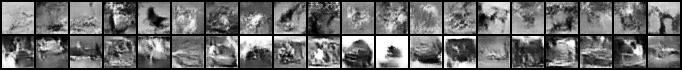

 98%|█████████▊| 98/100 [2:09:55<02:38, 79.36s/it]


Generator collapse check: no collapse detected, training shall continue.


---------------------------------------------------------------------------------
# [RAW SPLIT NODE Z] [EPOCH 99/100] [EPOCH TIME INTERVAL: 79.63 sec.] [ATTEMPT 1]
---------------------------------------------------------------------------------
Mean epoch losses/acc for each component in the MGAN: 
{'loss_disc_real': 0.43955, 'acc_disc_real': 0.7874, 'loss_disc_fake': 0.41126, 'acc_disc_fake': 0.84033, 'loss_gen_disc': 1.66676, 'loss_gen_clasf': 0.02764, 'loss_clasf': 0.02829, 'acc_clasf': 0.99233}


Sample of generated images from raw split MGAN for node Z (each row for each generator' output):
(This sample is saved at experiment_logs_cifar10_notebook/Z/raw_split/attempt_1_ep_99.jpg)


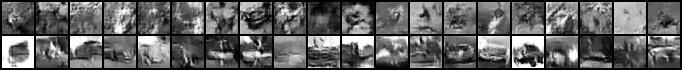

 99%|█████████▉| 99/100 [2:11:14<01:19, 79.46s/it]


Generator collapse check: no collapse detected, training shall continue.


----------------------------------------------------------------------------------
# [RAW SPLIT NODE Z] [EPOCH 100/100] [EPOCH TIME INTERVAL: 79.63 sec.] [ATTEMPT 1]
----------------------------------------------------------------------------------
Mean epoch losses/acc for each component in the MGAN: 
{'loss_disc_real': 0.44707, 'acc_disc_real': 0.78113, 'loss_disc_fake': 0.42444, 'acc_disc_fake': 0.827, 'loss_gen_disc': 1.7206, 'loss_gen_clasf': 0.03776, 'loss_clasf': 0.03869, 'acc_clasf': 0.98808}


Sample of generated images from raw split MGAN for node Z (each row for each generator' output):
(This sample is saved at experiment_logs_cifar10_notebook/Z/raw_split/attempt_1_ep_100.jpg)


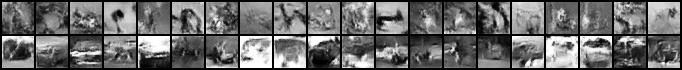

100%|██████████| 100/100 [2:12:34<00:00, 79.54s/it]


Generator collapse check: no collapse detected, training shall continue.


--------------------------------------
# END OF RAW SPLIT TRAINING FOR NODE Z
--------------------------------------
End of training.




------------------------------------------------------------------------------
# EXHIBITING BINARY CLUSTERING FOR NODE Z OBTAINED WITH CLASSIFIER'S INFERENCE
------------------------------------------------------------------------------
Local binary soft clustering (prob. mass division) for node Z, according to each reference class



Local soft clusters from binary split  airplane(6000.0)  automobile(6000.0)  \
0           Left cluster: ZL(raw split)           2550.93             1035.28   
1          Right cluster: ZR(raw split)           3449.07             4964.72   

   bird(6000.0)  cat(6000.0)  deer(6000.0)  dog(6000.0)  frog(6000.0)  \
0       4320.57      3807.15       3881.98      4204.41       4274.41   
1       1679.43      2192.85       2118.02      1795.59       1725.59   

   horse(6000.0)  ship(6000.0)  truck(6000.0)  
0        2728.12       1643.13        1033.04  
1        3271.88       4356.87        4966.96




--------------------------------------------
#
#
# GLOBAL TREE LOGS AFTER RAW SPLIT OF NODE Z
#
#
--------------------------------------------
----------------------------------
# GLOBAL TREE LOGS 1/3: TREE NODES
----------------------------------
Non-leaf nodes:
['Z (root node)']

Leaf nodes:
['ZL (raw split)', 'ZR (raw split)']


-----------------------------------------
# GLOBAL TREE LOGS 2/3: CLUSTERING MATRIX
-----------------------------------------
This table indicates the clustering matrix when it reaches N clusters, or N leaf nodes.
The final matrix occurs when N equals the number of classes.

(This table is saved at experiment_logs_cifar10_notebook/global_tree_logs.txt)


Leaf Nodes Clusters  airplane(6000)  automobile(6000)  bird(6000)  \
0      ZL (raw split)            2535               979        4376   
1      ZR (raw split)            3465              5021        1624   

   cat(6000)  deer(6000)  dog(6000)  frog(6000)  horse(6000)  ship(6000)  \
0       3861        3948       4287        4378         2718        1594   
1       2139        2052       1713        1622         3282        4406   

   truck(6000)  
0          941  
1         5059



------------------------------------------
# GLOBAL TREE LOGS 3/3: CLUSTERING METRICS
------------------------------------------
Normalized Mutual Information (NMI): 0.06965878344061127

Best accuracy (ACC) with at most 1 (one) class per cluster: 9437/60000 = 0.15728333333333333
Optimum assignment considered: 
['frog'(4378)] --> 'ZL'; ['truck'(5059)] --> 'ZR'; 

Best accuracy (ACC) with multiple classes per cluster: 42083/60000 = 0.7013833333333334
Optimum assignment considered: 
['bird'(4376),'cat'(3861),'deer'(3948),'dog'(4287),'frog'(4378)] --> 'ZL'; ['airplane'(3465),'automobile'(5021),'horse'(3282),'ship'(4406),'truck'(5059)] --> 'ZR'; 

(Note on the above ACC metrics: if the no. of classes is less then the no. clusters, we can either consider multiple classes belonging to a single cluster or left certain classes unassigned for computing ACC. The first ACC metric above considers at most 1 classes per cluster, and when the number of clusters and classes are equal, it provides the

  0%|          | 0/100 [00:00<?, ?it/s]



----------------------------------------------------------------------------------------------------
# [REFINEMENT 1 OF NODE Z SPLIT] [EPOCH 1/100] [EPOCH TIME INTERVAL: 81.70 sec.] [REF 1] [ATTEMPT 1]
----------------------------------------------------------------------------------------------------
Mean epoch losses/acc for each component in group l's GAN
{'loss_disc_real': 0.4479, 'acc_disc_real': 0.78217, 'loss_disc_fake': 0.40194, 'acc_disc_fake': 0.81233, 'loss_gen_disc': 3.12742, 'loss_gen_clasf': 0.61251, 'loss_clasf': 0.5423, 'acc_clasf': 0.7415}
Mean epoch losses/acc for each component in group m's GAN:
{'loss_disc_real': 0.28631, 'acc_disc_real': 0.86023, 'loss_disc_fake': 0.32457, 'acc_disc_fake': 0.8745, 'loss_gen_disc': 3.49299, 'loss_gen_clasf': 0.47195, 'loss_clasf': 0.5695, 'acc_clasf': 0.69225}

Sample of generated images from group l:
(This sample is saved at experiment_logs_cifar10_notebook/Z/refinement_1/attempt_1_ep_1_ZL.jpg)


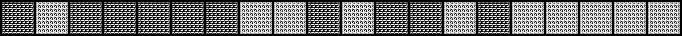


Sample of generated images from group m:
(This sample is saved at experiment_logs_cifar10_notebook/Z/refinement_1/attempt_1_ep_1_ZR.jpg)


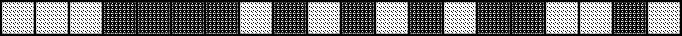

  1%|          | 1/100 [01:21<2:14:49, 81.71s/it]


Generator collapse will be checked after epoch 10


----------------------------------------------------------------------------------------------------
# [REFINEMENT 1 OF NODE Z SPLIT] [EPOCH 2/100] [EPOCH TIME INTERVAL: 82.85 sec.] [REF 1] [ATTEMPT 1]
----------------------------------------------------------------------------------------------------
Mean epoch losses/acc for each component in group l's GAN
{'loss_disc_real': 0.09839, 'acc_disc_real': 0.9661, 'loss_disc_fake': 0.07841, 'acc_disc_fake': 0.96833, 'loss_gen_disc': 6.15812, 'loss_gen_clasf': 0.36056, 'loss_clasf': 0.28454, 'acc_clasf': 0.92525}
Mean epoch losses/acc for each component in group m's GAN:
{'loss_disc_real': 0.17014, 'acc_disc_real': 0.93687, 'loss_disc_fake': 0.11785, 'acc_disc_fake': 0.95533, 'loss_gen_disc': 4.2866, 'loss_gen_clasf': 0.25671, 'loss_clasf': 0.37504, 'acc_clasf': 0.87033}

Sample of generated images from group l:
(This sample is saved at experiment_logs_cifar10_notebook/Z/refinement_1/atte

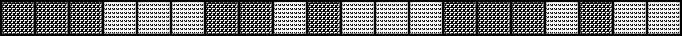


Sample of generated images from group m:
(This sample is saved at experiment_logs_cifar10_notebook/Z/refinement_1/attempt_1_ep_2_ZR.jpg)


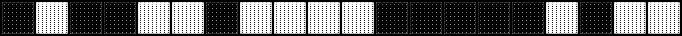

  2%|▏         | 2/100 [02:44<2:14:34, 82.39s/it]


Generator collapse will be checked after epoch 10


----------------------------------------------------------------------------------------------------
# [REFINEMENT 1 OF NODE Z SPLIT] [EPOCH 3/100] [EPOCH TIME INTERVAL: 96.10 sec.] [REF 1] [ATTEMPT 1]
----------------------------------------------------------------------------------------------------
Mean epoch losses/acc for each component in group l's GAN
{'loss_disc_real': 0.05622, 'acc_disc_real': 0.97807, 'loss_disc_fake': 0.04436, 'acc_disc_fake': 0.98317, 'loss_gen_disc': 5.90319, 'loss_gen_clasf': 0.40706, 'loss_clasf': 0.40682, 'acc_clasf': 0.86308}
Mean epoch losses/acc for each component in group m's GAN:
{'loss_disc_real': 0.10136, 'acc_disc_real': 0.9618, 'loss_disc_fake': 0.05509, 'acc_disc_fake': 0.99267, 'loss_gen_disc': 4.03188, 'loss_gen_clasf': 0.44018, 'loss_clasf': 0.50049, 'acc_clasf': 0.78433}

Sample of generated images from group l:
(This sample is saved at experiment_logs_cifar10_notebook/Z/refinement_1/att

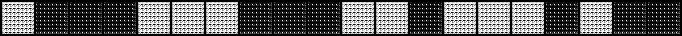


Sample of generated images from group m:
(This sample is saved at experiment_logs_cifar10_notebook/Z/refinement_1/attempt_1_ep_3_ZR.jpg)


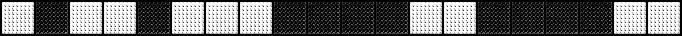

  3%|▎         | 3/100 [04:20<2:23:19, 88.66s/it]


Generator collapse will be checked after epoch 10


  3%|▎         | 3/100 [04:23<2:22:12, 87.96s/it]


KeyboardInterrupt: 

In [4]:
root_node = Node(args.root_node_name, dataloader_train.sampler.weights, args.logs_path)
grow_tree_from_root(root_node, dataloader_train, args)
                    
